# nxG_extractfeature_descStats extracted from graphs

DataFrame.describe(percentiles=None, include=None, exclude=None)[source]
Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

Parameters:	
percentiles : list-like of numbers, optional
The percentiles to include in the output. All should fall between 0 and 1. The default is [.25, .5, .75], which returns the 25th, 50th, and 75th percentiles.
include : ‘all’, list-like of dtypes or None (default), optional
A white list of data types to include in the result. Ignored for Series. Here are the options:
‘all’ : All columns of the input will be included in the output.

A list-like of dtypes : Limits the results to the provided data types. To limit the result to numeric types submit numpy.number. To limit it instead to object columns submit the numpy.object data type. Strings can also be used in the style of select_dtypes (e.g. df.describe(include=['O'])). To select pandas categorical columns, use 'category'

None (default) : The result will include all numeric columns.

exclude : list-like of dtypes or None (default), optional,

A black list of data types to omit from the result. Ignored for Series. Here are the options:

A list-like of dtypes : Excludes the provided data types from the result. To exclude numeric types submit numpy.number. To exclude object columns submit the data type numpy.object. Strings can also be used in the style of select_dtypes (e.g. df.describe(include=['O'])). To exclude pandas categorical columns, use 'category'
None (default) : The result will exclude nothing.

Returns:	
summary: Series/DataFrame of summary statistics


source: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html

## Notes

For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Timestamps also include the first and last items.

If multiple object values have the highest count, then the count and top results will be arbitrarily chosen from among those with the highest count.

For mixed data types provided via a DataFrame, the default is to return only an analysis of numeric columns. If the dataframe consists only of object and categorical data without any numeric columns, the default is to return an analysis of both the object and categorical columns. If include='all' is provided as an option, the result will include a union of attributes of each type.

The include and exclude parameters can be used to limit which columns in a DataFrame are analyzed for the output. The parameters are ignored when analyzing a Series.

In [1]:
# returning 18 variables
# discrall_Degree.columns
'''
Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max',
   u'skew', u'kurt', u'var', u'cumsummean', u'cumsumstd', u'cumsummin',
   u'cumsum25%', u'cumsum50%', u'cumsum75%', u'cumsummax']
'''

"\nIndex([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max',\n   u'skew', u'kurt', u'var', u'cumsummean', u'cumsumstd', u'cumsummin',\n   u'cumsum25%', u'cumsum50%', u'cumsum75%', u'cumsummax']\n"

# SAE: Autoencoder trainig and validation
## from NME_DEC/train_sae_wimgfeatures_descStats.py

In [2]:
import sys
import os
sys.path.insert(0,'Z:/Cristina/Section3/NME_DEC')
sys.path.insert(0,'Z:\\Cristina\\Section3\\NME_DEC\\SAEmodels')
# pylint: skip-file
import sys
import os
import mxnet as mx
import numpy as np
import pandas as pd
import data
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import model
from autoencoder import AutoEncoderModel
from solver import Solver, Monitor
import logging
import sklearn
from sklearn.manifold import TSNE
from utilities import *
try:
   import cPickle as pickle
except:
   import pickle
import gzip

# for visualization
from sklearn.manifold import TSNE
from utilities import *
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
NME_nxgraphs = r'Z:\Cristina\Section3\breast_MR_NME_biological\NMEs_SER_nxgmetrics'
    
allNMEs_dynamic = pd.read_csv(os.path.join(NME_nxgraphs,'dyn_roi_records_allNMEs_descStats.csv'), index_col=0)

allNMEs_morphology = pd.read_csv(os.path.join(NME_nxgraphs,'morpho_roi_records_allNMEs_descStats.csv'), index_col=0)

allNMEs_texture = pd.read_csv(os.path.join(NME_nxgraphs,'text_roi_records_allNMEs_descStats.csv'), index_col=0)

allNMEs_stage1 = pd.read_csv(os.path.join(NME_nxgraphs,'stage1_roi_records_allNMEs_descStats.csv'), index_col=0)

# to load SERw matrices for all lesions
with gzip.open(os.path.join(NME_nxgraphs,'nxGdatafeatures_allNMEs_descStats.pklz'), 'rb') as fin:
    nxGdatafeatures = pickle.load(fin)

# to load discrall_dict dict for all lesions
with gzip.open(os.path.join(NME_nxgraphs,'nxGnormfeatures_allNMEs_descStats.pklz'), 'rb') as fin:
    discrall_dict_allNMEs = pickle.load(fin)           

#########
# shape input (798L, 427L)     
nxGdiscfeatures = discrall_dict_allNMEs   
print('Loading {} leasions with nxGdiscfeatures of size = {}'.format(nxGdiscfeatures.shape[0], nxGdiscfeatures.shape[1]) )

print('Normalizing dynamic {} leasions with features of size = {}'.format(allNMEs_dynamic.shape[0], allNMEs_dynamic.shape[1]))
normdynamic = (allNMEs_dynamic - allNMEs_dynamic.mean(axis=0)) / allNMEs_dynamic.std(axis=0)
normdynamic.mean(axis=0)

print('Normalizing morphology {} leasions with features of size = {}'.format(allNMEs_morphology.shape[0], allNMEs_morphology.shape[1]))
normorpho = (allNMEs_morphology - allNMEs_morphology.mean(axis=0)) / allNMEs_morphology.std(axis=0)
normorpho.mean(axis=0)

print('Normalizing texture {} leasions with features of size = {}'.format(allNMEs_texture.shape[0], allNMEs_texture.shape[1]))
normtext = (allNMEs_texture - allNMEs_texture.mean(axis=0)) / allNMEs_texture.std(axis=0)
normtext.mean(axis=0)

print('Normalizing stage1 {} leasions with features of size = {}'.format(allNMEs_stage1.shape[0], allNMEs_stage1.shape[1]))
normstage1 = (allNMEs_stage1 - allNMEs_stage1.mean(axis=0)) / allNMEs_stage1.std(axis=0)
normstage1.mean(axis=0)

# shape input (798L, 427L)    
combX_allNME = np.concatenate((nxGdiscfeatures, normdynamic.as_matrix(), normorpho.as_matrix(), normtext.as_matrix(), normstage1.as_matrix()), axis=1)       
YnxG_allNME = np.asarray([nxGdatafeatures['roi_id'].values,
        nxGdatafeatures['classNME'].values,
        nxGdatafeatures['nme_dist'].values,
        nxGdatafeatures['nme_int'].values])

print('Loading {} all NME of size = {}'.format(combX_allNME.shape[0], combX_allNME.shape[1]) )
print('Loading all NME lables [label,BIRADS,dist,enh] of size = {}'.format(YnxG_allNME[0].shape[0])   )


Loading 792 leasions with nxGdiscfeatures of size = 326
Normalizing dynamic 792 leasions with features of size = 34
Normalizing morphology 792 leasions with features of size = 19
Normalizing texture 792 leasions with features of size = 44
Normalizing stage1 792 leasions with features of size = 100
Loading 792 all NME of size = 523
Loading all NME lables [label,BIRADS,dist,enh] of size = 792


In [4]:
######################
## From Pre-train/fine tune the SAE
######################
save_to = r'Z:\Cristina\Section3\NME_DEC\SAEmodels'
input_size = combX_allNME.shape[1]
latent_size = [input_size/rxf for rxf in [25,15,10,5,2]]

# train/test splits (test is 10% of labeled data)
sep = int(combX_allNME.shape[0]*0.10)
X_val = combX_allNME[:sep]
y_val = YnxG_allNME[1][:sep]
X_train = combX_allNME[sep:]
y_train = YnxG_allNME[1][sep:]
batch_size = 125 # 160 32*5 = update_interval*5
X_val[np.isnan(X_val)] = 0.00001

allAutoencoders = []
for output_size in latent_size:
    # Train or Read autoencoder: interested in encoding/decoding the input nxg features into LD latent space        
    # optimized for clustering with DEC
    xpu = mx.cpu()
    ae_model = AutoEncoderModel(xpu, [X_train.shape[1],500,500,2000,output_size], pt_dropout=0.2)
    ##  After Pre-train and finetuuning on X_train
    ae_model.load( os.path.join(save_to,'SAE_zsize{}_wimgfeatures_descStats_zeromean.arg'.format(str(output_size))) ) 

    ##  Get train/valid error (for Generalization)
    print "Autoencoder Training error: %f"%ae_model.eval(X_train)
    print "Autoencoder Validation error: %f"%ae_model.eval(X_val)
    # put useful metrics in a dict
    outdict = {'Training set': ae_model.eval(X_train),
               'Testing set': ae_model.eval(X_val),
               'output_size': output_size,
               'sep': sep}

    allAutoencoders.append(outdict)


Autoencoder Training error: 0.000937
Autoencoder Validation error: 0.060106
Autoencoder Training error: 0.000890
Autoencoder Validation error: 0.042340
Autoencoder Training error: 0.000910
Autoencoder Validation error: 0.027583
Autoencoder Training error: 0.000802
Autoencoder Validation error: 0.017948
Autoencoder Training error: 0.000583
Autoencoder Validation error: 0.016800


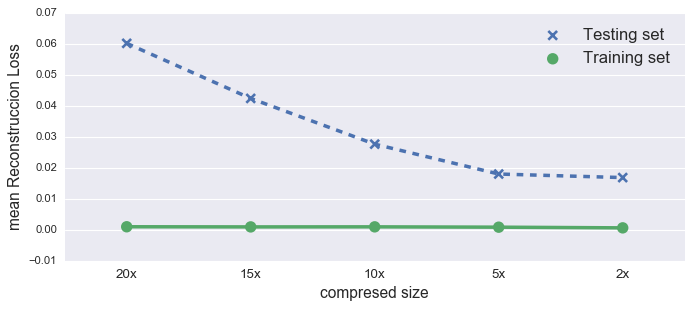

In [5]:
######################
## Visualize the reconstructed inputs and the encoded representations.
######################
# train/test loss value o
dfSAE_perf = pd.DataFrame()
for SAE_perf in allAutoencoders:
    dfSAE_perf = dfSAE_perf.append( pd.DataFrame({'Reconstruction Error': pd.Series(SAE_perf)[0:2], 'train/validation':pd.Series(SAE_perf)[0:2].index, 'compressed size': SAE_perf['output_size']}) ) 

sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10, 4))
sns.set_color_codes("pastel")
axSAE_perf = sns.pointplot(x="compressed size", y="Reconstruction Error", hue="train/validation", data=dfSAE_perf,  
                           markers=["x","o"], linestyles=["--","-"])  
aa=ax.set_xticklabels(['20x',"15x","10x","5x","2x"],fontsize=12)
ax.set_xlabel('compresed size',fontsize=14)
ax.set_ylabel('mean Reconstruccion Loss',fontsize=14)
ax.legend(loc="upper right",fontsize=15)

##################################################################
# Compare formally supervised and semi-supervised learning
## 1) Naive: Supervised learning in HD space (with feature selection):
##################################################################

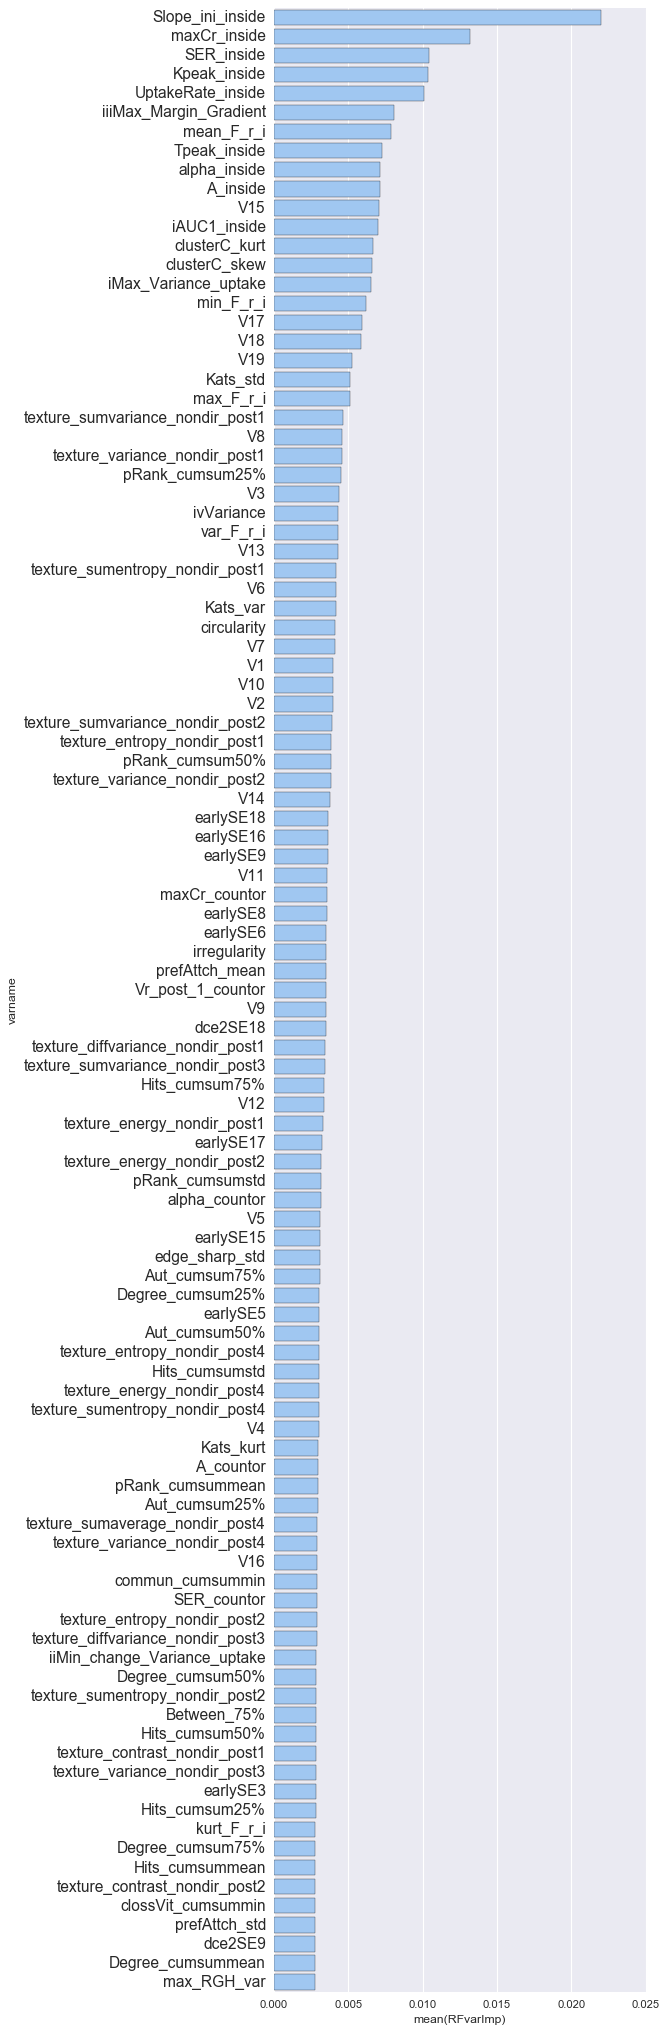

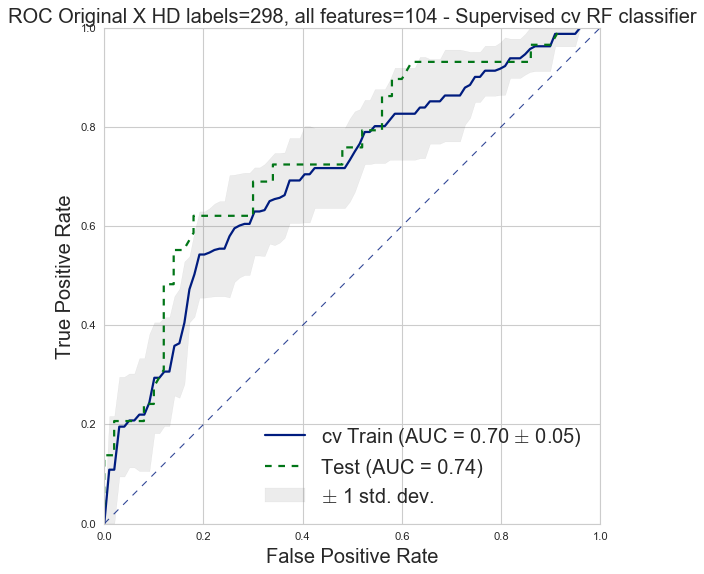

In [6]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

# define variables for DEC 
roi_labels = YnxG_allNME[1]  
roi_labels = ['K' if rl=='U' else rl for rl in roi_labels]

# unbiased validation with held-out set
sep = int(combX_allNME.shape[0]*0.10)
X_val = combX_allNME[:sep]
y_val = roi_labels[:sep]

X_train = combX_allNME[sep:]
y_train = roi_labels[sep:]

# Classification and ROC analysis
datalabels = np.asarray(y_train)
dataspace = X_train
X = dataspace[datalabels!='K',:]
y = np.asarray(datalabels[datalabels!='K']=='M').astype(int)

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5, random_state=3)
RFmodel = RandomForestClassifier(n_jobs=2, n_estimators=500, random_state=0, verbose=0)
RFmodel.fit(X_train, y_train)

allNME_featurenames = pd.read_csv(os.path.join(NME_nxgraphs,'named_nxGnormfeatures_allNMEs_descStats.csv'), index_col=0)
X_allNME_featurenames = np.concatenate((np.vstack(allNME_featurenames.columns),np.vstack(allNMEs_dynamic.columns),np.vstack(allNMEs_morphology.columns),np.vstack(allNMEs_texture.columns),np.vstack(allNMEs_stage1.columns)), axis=0).flatten()  
ind_featImp = np.argsort(RFmodel.feature_importances_)[::-1]
X_allNME_featurenames[ind_featImp]

# create pandas dF with variable importabces
RFfeatImportances = pd.DataFrame({'varname':X_allNME_featurenames[ind_featImp], 'RFvarImp':np.sort(RFmodel.feature_importances_)[::-1]})

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 32))
# Plot the total crashes
sns.set_color_codes("pastel")
# of all 523 variables seclec those wiht positive varImportances
varDiscrim = RFfeatImportances[RFfeatImportances['RFvarImp']>0.0]

# top 20% features only = 523*0.20
varDiscrim = RFfeatImportances.iloc[0:int(523*0.20)]
sns.barplot(x="RFvarImp", y="varname", data=varDiscrim, label="varname", color="b")
aa=ax.set_yticklabels(varDiscrim['varname'],fontsize=14)

##################################################################
## SELECT ONLY 10% TOP
##################################################################
top20_indfea = ind_featImp[0:int(523*0.20)]
top20_combX_allNME = combX_allNME[:,top20_indfea]

# unbiased validation with held-out set
sep = int(top20_combX_allNME.shape[0]*0.10)
X_val = top20_combX_allNME[:sep]
y_val = roi_labels[:sep]

X_train = top20_combX_allNME[sep:]
y_train = roi_labels[sep:]

# Classification and ROC analysis
datalabels = np.asarray(y_train)
dataspace = X_train
X = dataspace[datalabels!='K',:]
y = np.asarray(datalabels[datalabels!='K']=='M').astype(int)

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
RFmodel = RandomForestClassifier(n_jobs=2, n_estimators=500, random_state=0, verbose=0)
# Evaluate a score by cross-validation
sns.set_style("whitegrid")
sns.set_color_codes("dark")
figROCs = plt.figure(figsize=(8,8))    
axaroc = figROCs.add_subplot(1,1,1)              
tprs = []; aucs = []
mean_fpr_OrigX = np.linspace(0, 1, 100)
cvi = 0
for train, test in cv.split(X, y):
    probas = RFmodel.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y[test], probas[:, 1])
    # to create an ROC with 100 pts
    tprs.append(interp(mean_fpr_OrigX, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    # plot
    #axaroc = figROCs.add_subplot(1,1,1)
    #axaroc.plot(fpr, tpr, lw=1, alpha=0.5) # with label add: label='cv %d, AUC %0.2f' % (cvi, roc_auc)
    cvi += 1

axaroc.plot([0, 1], [0, 1], linestyle='--', lw=1, color='b',alpha=.8)
mean_tpr_OrigX = np.mean(tprs, axis=0)
mean_tpr_OrigX[-1] = 1.0
mean_auc_OrigX = auc(mean_fpr_OrigX, mean_tpr_OrigX)
std_auc_OrigX = np.std(aucs)
axaroc.plot(mean_fpr_OrigX, mean_tpr_OrigX, color='b',
         label=r'cv Train (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_OrigX, std_auc_OrigX),
         lw=2, alpha=1)     
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr_OrigX + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr_OrigX - std_tpr, 0)
axaroc.fill_between(mean_fpr_OrigX, tprs_lower, tprs_upper, color='grey', alpha=.15,
                 label=r'$\pm$ 1 std. dev.') 

'''
# plot AUC on validation set
'''
y_val_bin = (np.asarray(y_val)=='M').astype(int)
probas_val = RFmodel.fit(X, y).predict_proba(X_val)

# Compute ROC curve and area the curve
fpr_val_OrigX, tpr_val_OrigX, thresholds_val = roc_curve(y_val_bin, probas_val[:, 1])
auc_val_OrigX = auc(fpr_val_OrigX, tpr_val_OrigX)
axaroc.plot(fpr_val_OrigX, tpr_val_OrigX, color='g',linestyle='--',
            label=r'Test (AUC = %0.2f)' % (auc_val_OrigX),
             lw=2, alpha=1)     


axaroc.set_xlabel('False Positive Rate',fontsize=18)
axaroc.set_ylabel('True Positive Rate',fontsize=18)
axaroc.set_title('ROC Original X HD labels={}, all features={} - Supervised cv RF classifier'.format(X.shape[0],X.shape[1]), fontsize=18)
axaroc.legend(loc="lower right",fontsize=18)

##################################################################
##  Unsupervised learning in optimal LD space: Fitting aN MLP DUAL OPTIMIZATION
################################################################## 

Loading autoencoder of znum = 261, mu = 3 , post training DEC results
DEC train init AUC = 0.673262032086
DEC train max meanAuc_cv = 0.732642602496 $\pm$ 0.0931672775493
DEC validation AUC at max meanAuc_cv = 0.775172413793

... MLP fully coneected layer trained on Z_train tested on Z_test


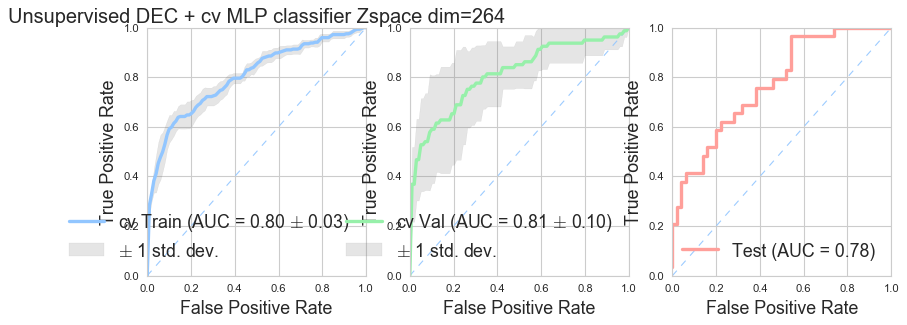

Loading autoencoder of znum = 261, mu = 4 , post training DEC results
DEC train init AUC = 0.677963458111
DEC train max meanAuc_cv = 0.731417112299 $\pm$ 0.0895483390756
DEC validation AUC at max meanAuc_cv = 0.740689655172

... MLP fully coneected layer trained on Z_train tested on Z_test


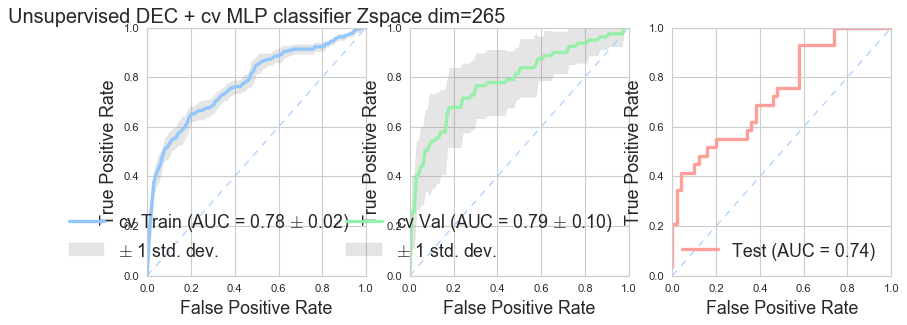

Loading autoencoder of znum = 261, mu = 5 , post training DEC results
DEC train init AUC = 0.685658051099
DEC train max meanAuc_cv = 0.734061200238 $\pm$ 0.0829846283581
DEC validation AUC at max meanAuc_cv = 0.702068965517

... MLP fully coneected layer trained on Z_train tested on Z_test


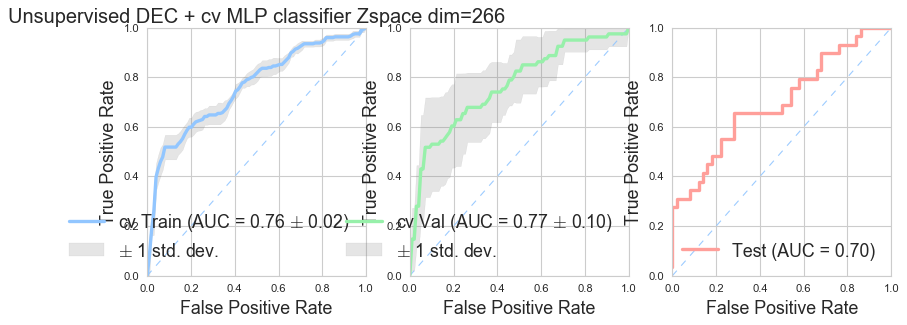

Loading autoencoder of znum = 261, mu = 6 , post training DEC results
DEC train init AUC = 0.687923351159
DEC train max meanAuc_cv = 0.72506684492 $\pm$ 0.0744661351573
DEC validation AUC at max meanAuc_cv = 0.74

... MLP fully coneected layer trained on Z_train tested on Z_test


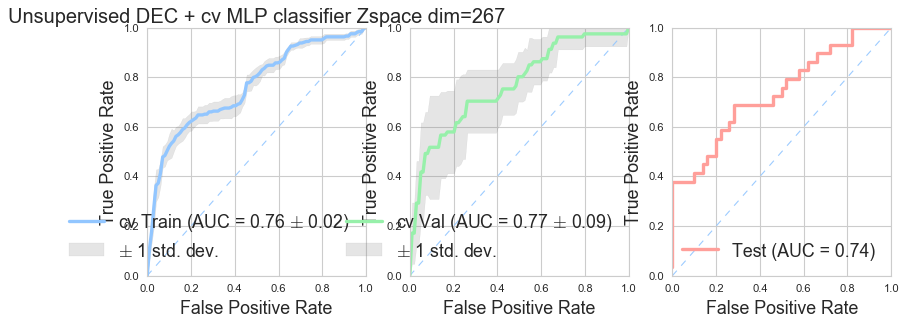

Loading autoencoder of znum = 261, mu = 7 , post training DEC results
DEC train init AUC = 0.663049613785
DEC train max meanAuc_cv = 0.723499702911 $\pm$ 0.0858269809613
DEC validation AUC at max meanAuc_cv = 0.766896551724

... MLP fully coneected layer trained on Z_train tested on Z_test


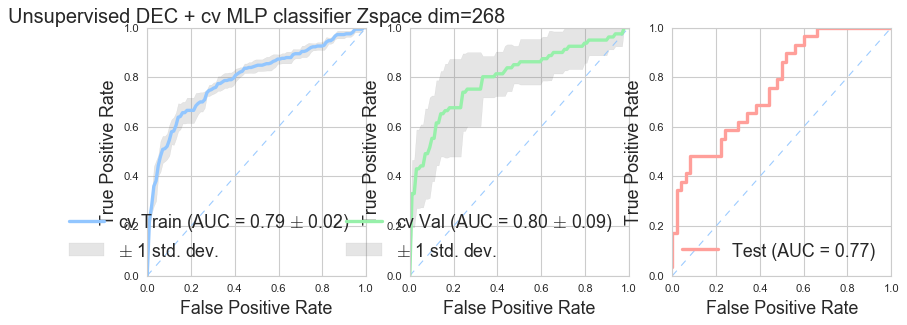

Loading autoencoder of znum = 261, mu = 8 , post training DEC results
DEC train init AUC = 0.695291146762
DEC train max meanAuc_cv = 0.7311942959 $\pm$ 0.0933493696945
DEC validation AUC at max meanAuc_cv = 0.764137931034

... MLP fully coneected layer trained on Z_train tested on Z_test


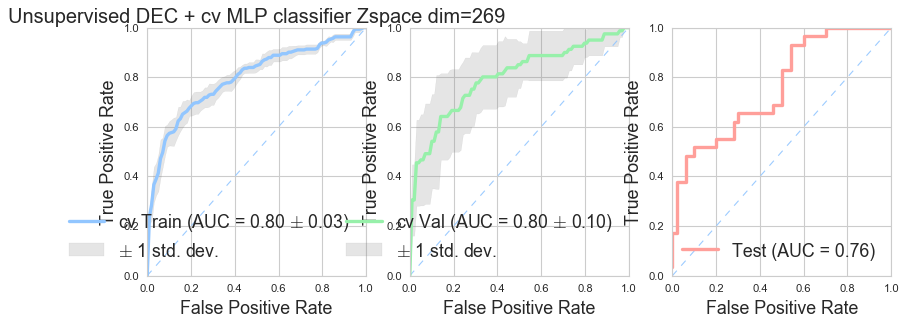

Loading autoencoder of znum = 261, mu = 9 , post training DEC results
DEC train init AUC = 0.711415626857
DEC train max meanAuc_cv = 0.703535353535 $\pm$ 0.0821212564027
DEC validation AUC at max meanAuc_cv = 0.737931034483

... MLP fully coneected layer trained on Z_train tested on Z_test


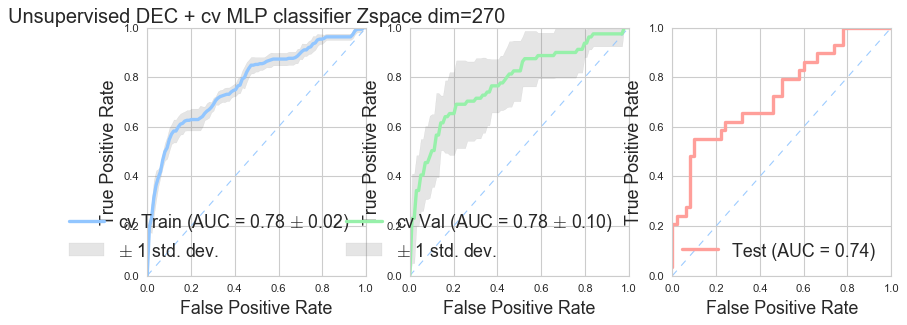

Loading autoencoder of znum = 261, mu = 10 , post training DEC results
DEC train init AUC = 0.641837492573
DEC train max meanAuc_cv = 0.702792632204 $\pm$ 0.0851479319258
DEC validation AUC at max meanAuc_cv = 0.752413793103

... MLP fully coneected layer trained on Z_train tested on Z_test


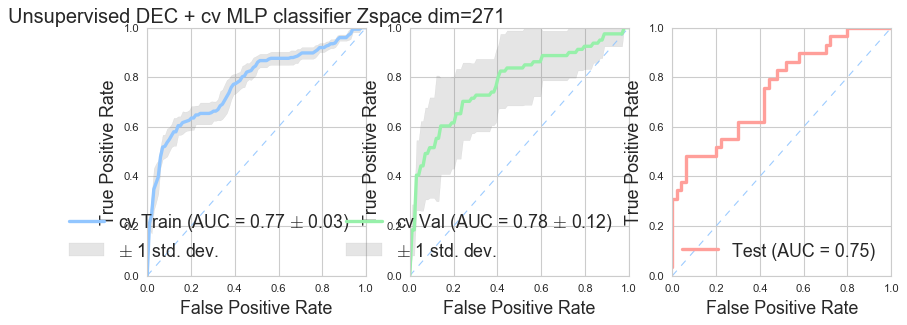

Loading autoencoder of znum = 261, mu = 11 , post training DEC results
DEC train init AUC = 0.662967914439
DEC train max meanAuc_cv = 0.728490790255 $\pm$ 0.0975338789362
DEC validation AUC at max meanAuc_cv = 0.751724137931

... MLP fully coneected layer trained on Z_train tested on Z_test


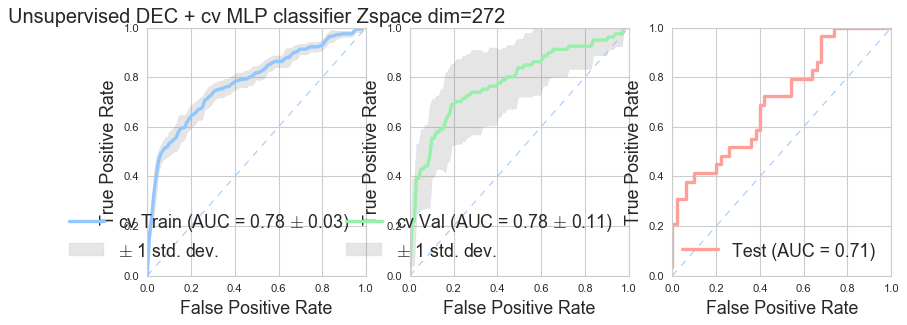

Loading autoencoder of znum = 261, mu = 12 , post training DEC results
DEC train init AUC = 0.642557932264
DEC train max meanAuc_cv = 0.723247177659 $\pm$ 0.0840747895324
DEC validation AUC at max meanAuc_cv = 0.747586206897

... MLP fully coneected layer trained on Z_train tested on Z_test


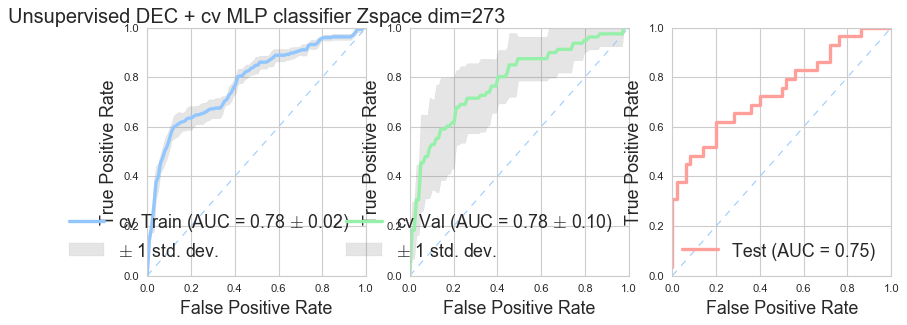

Loading autoencoder of znum = 104, mu = 3 , post training DEC results
DEC train init AUC = 0.652257872846
DEC train max meanAuc_cv = 0.689579619727 $\pm$ 0.101721841667
DEC validation AUC at max meanAuc_cv = 0.729655172414

... MLP fully coneected layer trained on Z_train tested on Z_test


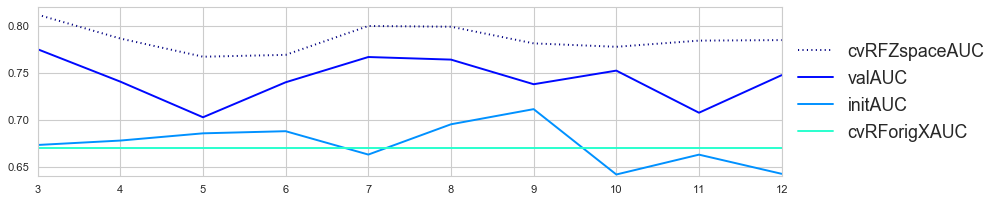

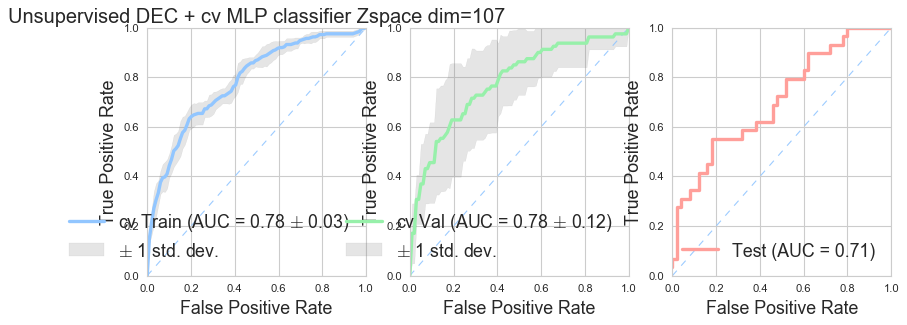

Loading autoencoder of znum = 104, mu = 4 , post training DEC results
DEC train init AUC = 0.628461081402
DEC train max meanAuc_cv = 0.664423648247 $\pm$ 0.0870075352121
DEC validation AUC at max meanAuc_cv = 0.698620689655

... MLP fully coneected layer trained on Z_train tested on Z_test


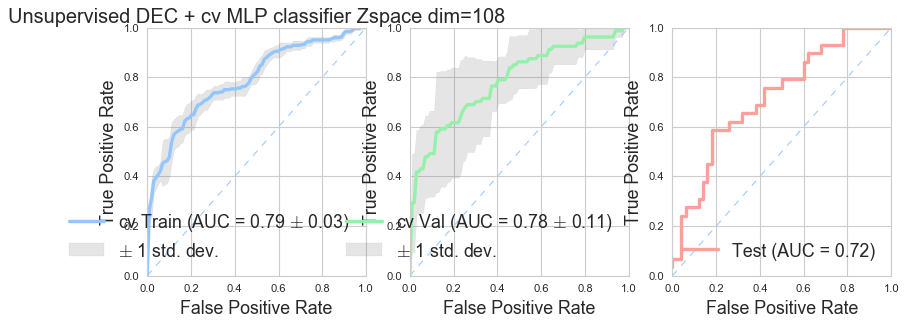

Loading autoencoder of znum = 104, mu = 5 , post training DEC results
DEC train init AUC = 0.655622400475
DEC train max meanAuc_cv = 0.711319073084 $\pm$ 0.102277305304
DEC validation AUC at max meanAuc_cv = 0.711724137931

... MLP fully coneected layer trained on Z_train tested on Z_test


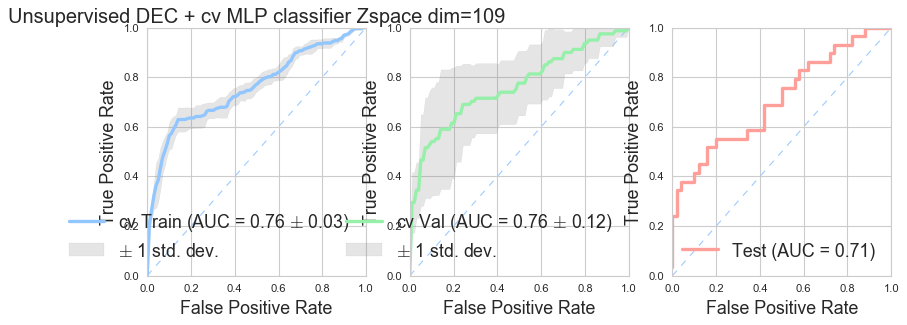

Loading autoencoder of znum = 104, mu = 6 , post training DEC results
DEC train init AUC = 0.621821152704
DEC train max meanAuc_cv = 0.71977124183 $\pm$ 0.0911736437
DEC validation AUC at max meanAuc_cv = 0.739310344828

... MLP fully coneected layer trained on Z_train tested on Z_test


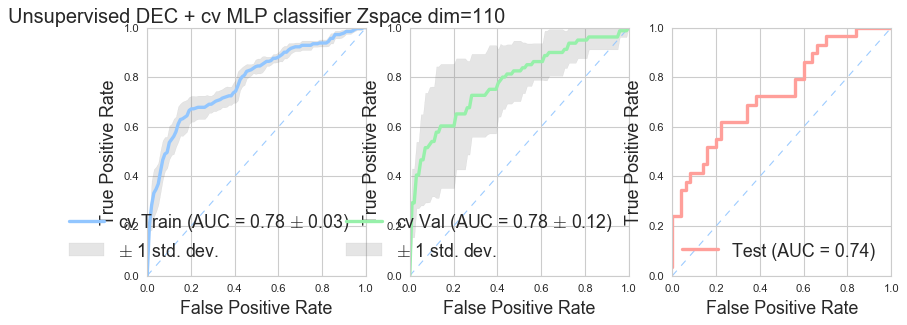

Loading autoencoder of znum = 104, mu = 7 , post training DEC results
DEC train init AUC = 0.613502673797
DEC train max meanAuc_cv = 0.716347296494 $\pm$ 0.107785233397
DEC validation AUC at max meanAuc_cv = 0.717931034483

... MLP fully coneected layer trained on Z_train tested on Z_test


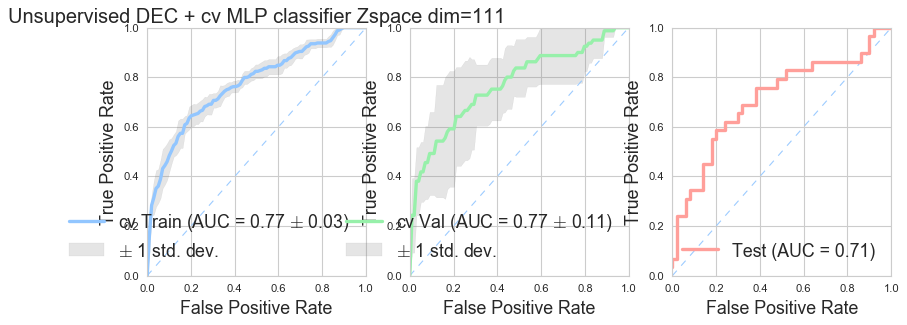

Loading autoencoder of znum = 104, mu = 8 , post training DEC results
DEC train init AUC = 0.667810457516
DEC train max meanAuc_cv = 0.717446524064 $\pm$ 0.0927265480777
DEC validation AUC at max meanAuc_cv = 0.725517241379

... MLP fully coneected layer trained on Z_train tested on Z_test


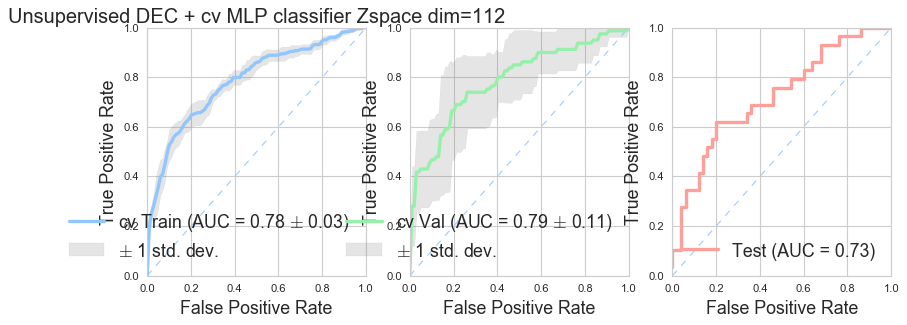

Loading autoencoder of znum = 104, mu = 9 , post training DEC results
DEC train init AUC = 0.632508912656
DEC train max meanAuc_cv = 0.716941473559 $\pm$ 0.102839241571
DEC validation AUC at max meanAuc_cv = 0.708965517241

... MLP fully coneected layer trained on Z_train tested on Z_test


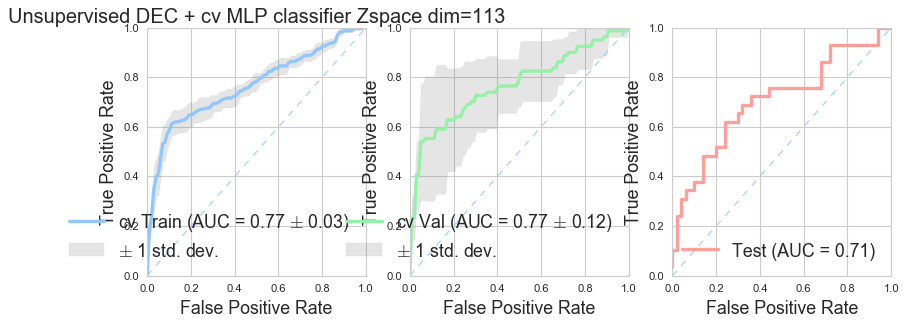

Loading autoencoder of znum = 104, mu = 10 , post training DEC results
DEC train init AUC = 0.668820558526
DEC train max meanAuc_cv = 0.716154188948 $\pm$ 0.0909750155404
DEC validation AUC at max meanAuc_cv = 0.753793103448

... MLP fully coneected layer trained on Z_train tested on Z_test


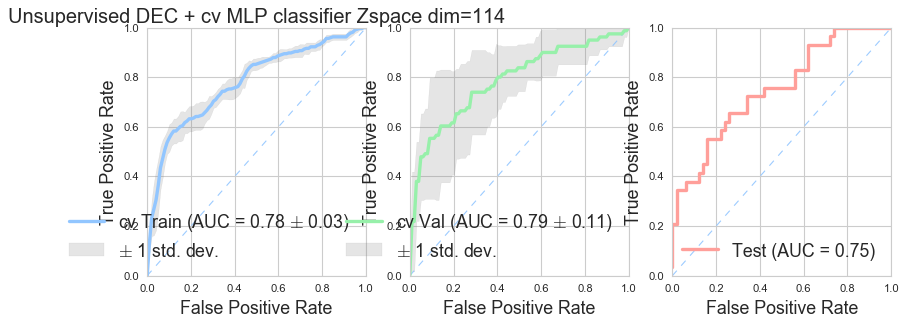

Loading autoencoder of znum = 104, mu = 11 , post training DEC results
DEC train init AUC = 0.65713755199
DEC train max meanAuc_cv = 0.722704991087 $\pm$ 0.088124678953
DEC validation AUC at max meanAuc_cv = 0.688965517241

... MLP fully coneected layer trained on Z_train tested on Z_test


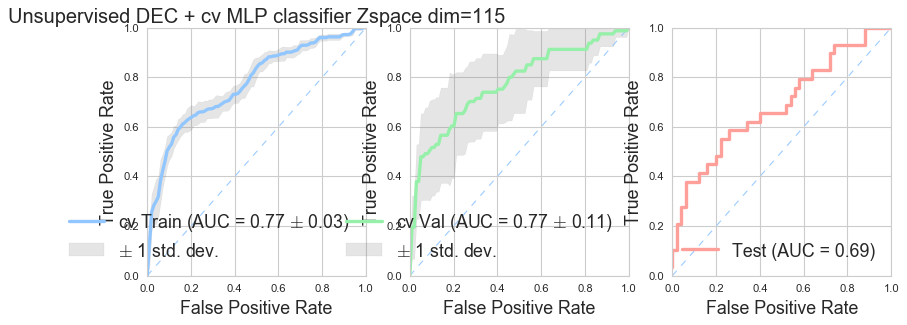

Loading autoencoder of znum = 104, mu = 12 , post training DEC results
DEC train init AUC = 0.616451277481
DEC train max meanAuc_cv = 0.715886809269 $\pm$ 0.104953199122
DEC validation AUC at max meanAuc_cv = 0.716551724138

... MLP fully coneected layer trained on Z_train tested on Z_test


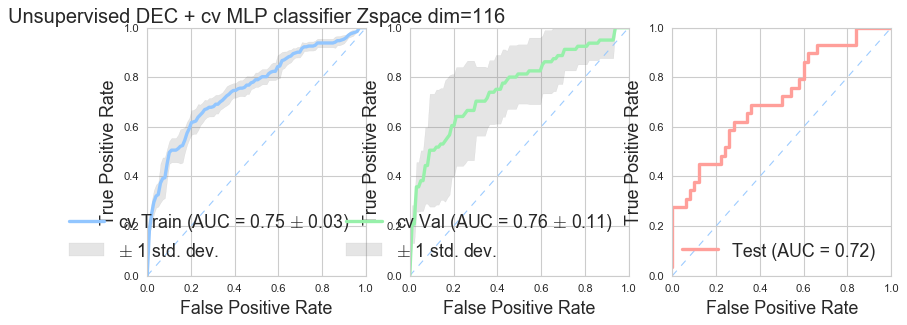

Loading autoencoder of znum = 52, mu = 3 , post training DEC results
DEC train init AUC = 0.607546048723
DEC train max meanAuc_cv = 0.671732026144 $\pm$ 0.120839844644
DEC validation AUC at max meanAuc_cv = 0.591724137931

... MLP fully coneected layer trained on Z_train tested on Z_test


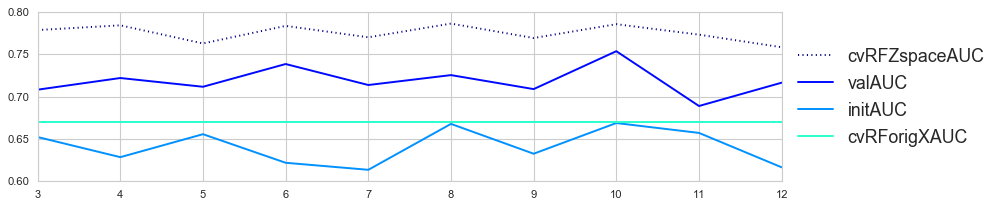

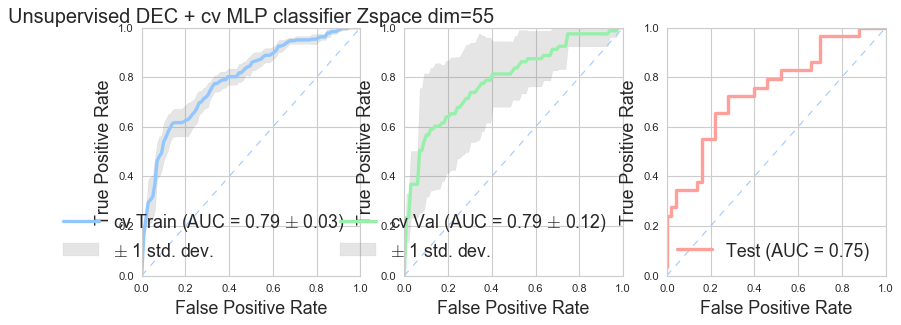

Loading autoencoder of znum = 52, mu = 4 , post training DEC results
DEC train init AUC = 0.612351455734
DEC train max meanAuc_cv = 0.642847593583 $\pm$ 0.118448736104
DEC validation AUC at max meanAuc_cv = 0.715172413793

... MLP fully coneected layer trained on Z_train tested on Z_test


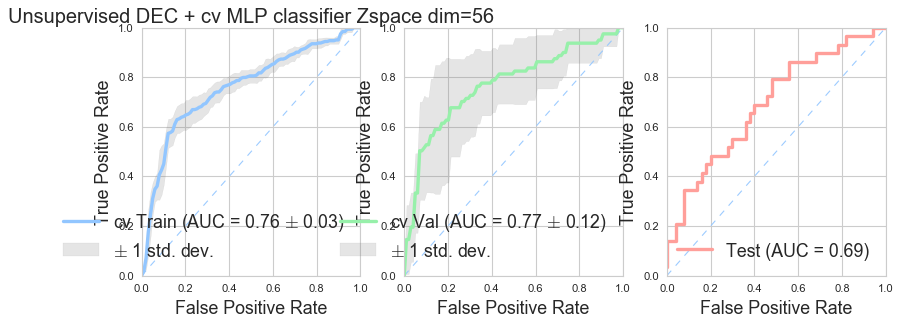

Loading autoencoder of znum = 52, mu = 5 , post training DEC results
DEC train init AUC = 0.604270647653
DEC train max meanAuc_cv = 0.689208259061 $\pm$ 0.104287918419
DEC validation AUC at max meanAuc_cv = 0.706206896552

... MLP fully coneected layer trained on Z_train tested on Z_test


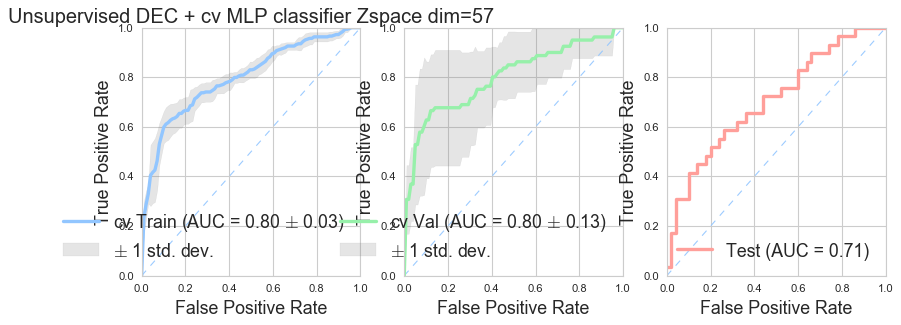

Loading autoencoder of znum = 52, mu = 6 , post training DEC results
DEC train init AUC = 0.609685086156
DEC train max meanAuc_cv = 0.690441176471 $\pm$ 0.0968092559628
DEC validation AUC at max meanAuc_cv = 0.653793103448

... MLP fully coneected layer trained on Z_train tested on Z_test


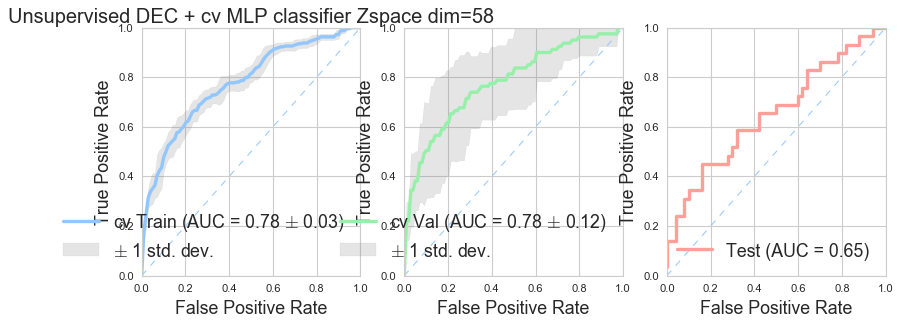

Loading autoencoder of znum = 52, mu = 7 , post training DEC results
DEC train init AUC = 0.580481283422
DEC train max meanAuc_cv = 0.690292632204 $\pm$ 0.102921854986
DEC validation AUC at max meanAuc_cv = 0.695172413793

... MLP fully coneected layer trained on Z_train tested on Z_test


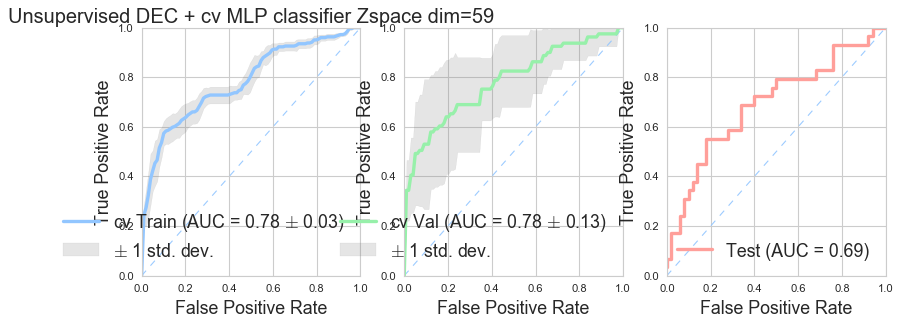

Loading autoencoder of znum = 52, mu = 8 , post training DEC results
DEC train init AUC = 0.62385620915
DEC train max meanAuc_cv = 0.689661319073 $\pm$ 0.0950056095324
DEC validation AUC at max meanAuc_cv = 0.733793103448

... MLP fully coneected layer trained on Z_train tested on Z_test


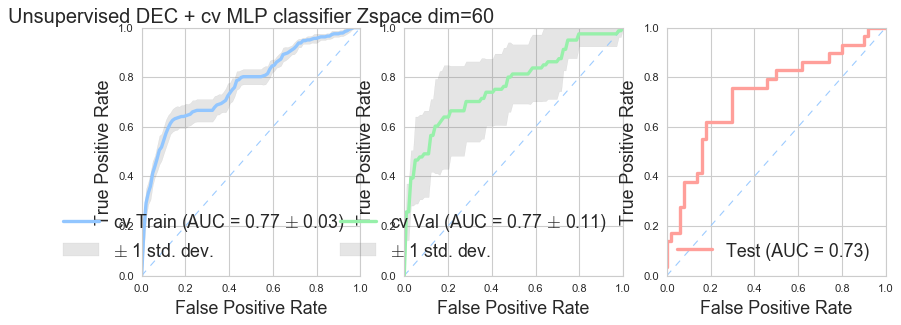

Loading autoencoder of znum = 52, mu = 9 , post training DEC results
DEC train init AUC = 0.632976827094
DEC train max meanAuc_cv = 0.687707961973 $\pm$ 0.114863560775
DEC validation AUC at max meanAuc_cv = 0.675862068966

... MLP fully coneected layer trained on Z_train tested on Z_test


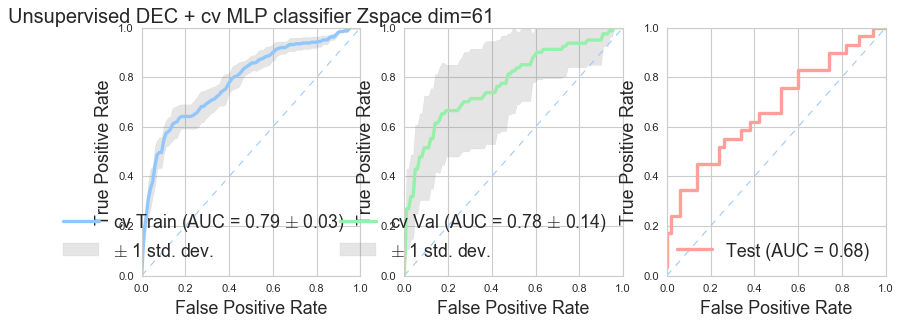

Loading autoencoder of znum = 52, mu = 10 , post training DEC results
DEC train init AUC = 0.592966428996
DEC train max meanAuc_cv = 0.686289364231 $\pm$ 0.0953059823717
DEC validation AUC at max meanAuc_cv = 0.74

... MLP fully coneected layer trained on Z_train tested on Z_test


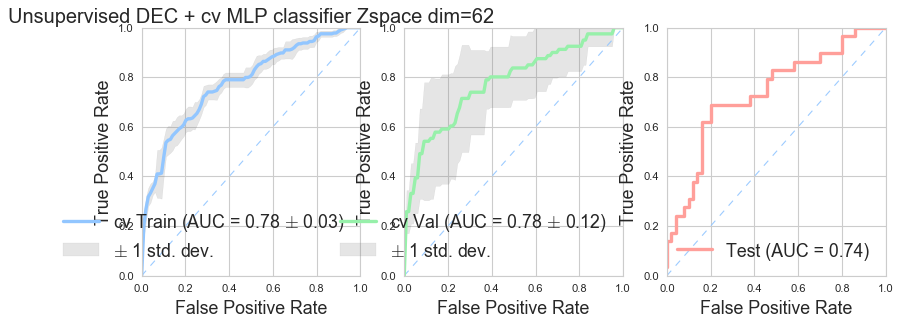

Loading autoencoder of znum = 52, mu = 11 , post training DEC results
DEC train init AUC = 0.603342245989
DEC train max meanAuc_cv = 0.70116607249 $\pm$ 0.108770600015
DEC validation AUC at max meanAuc_cv = 0.648965517241

... MLP fully coneected layer trained on Z_train tested on Z_test


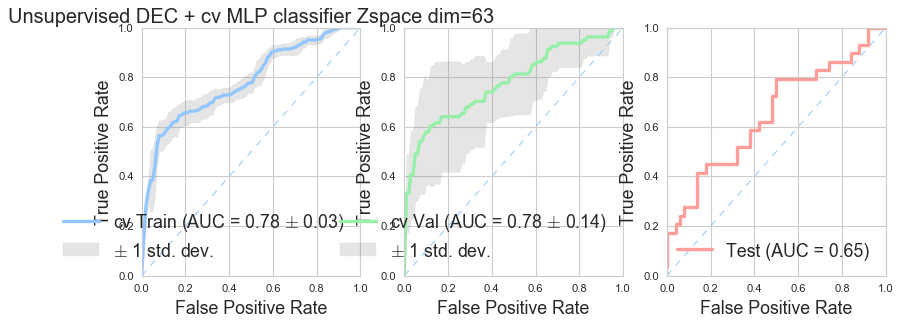

Loading autoencoder of znum = 52, mu = 12 , post training DEC results
DEC train init AUC = 0.585732323232
DEC train max meanAuc_cv = 0.696910279263 $\pm$ 0.0938364555179
DEC validation AUC at max meanAuc_cv = 0.698620689655

... MLP fully coneected layer trained on Z_train tested on Z_test


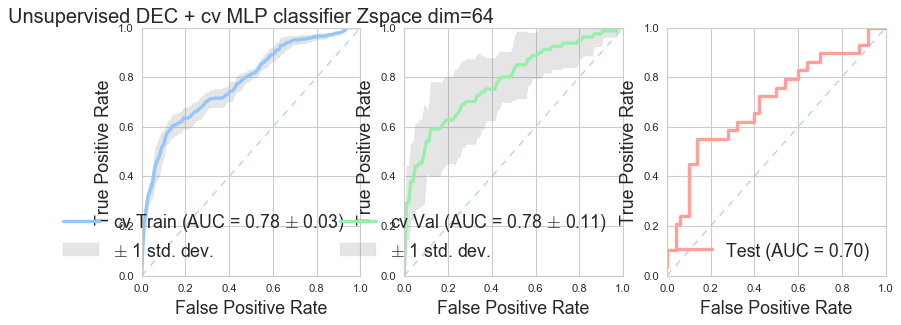

Loading autoencoder of znum = 34, mu = 3 , post training DEC results
DEC train init AUC = 0.6416295306
DEC train max meanAuc_cv = 0.663250148544 $\pm$ 0.0975712138706
DEC validation AUC at max meanAuc_cv = 0.726206896552

... MLP fully coneected layer trained on Z_train tested on Z_test


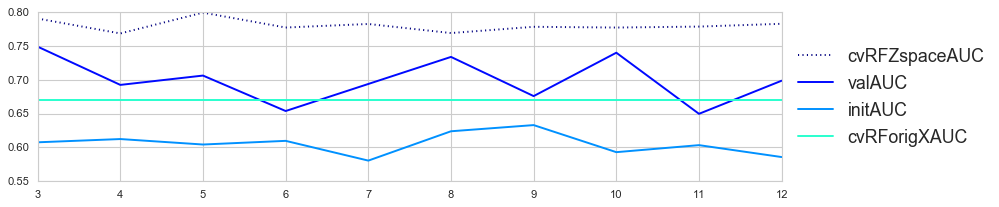

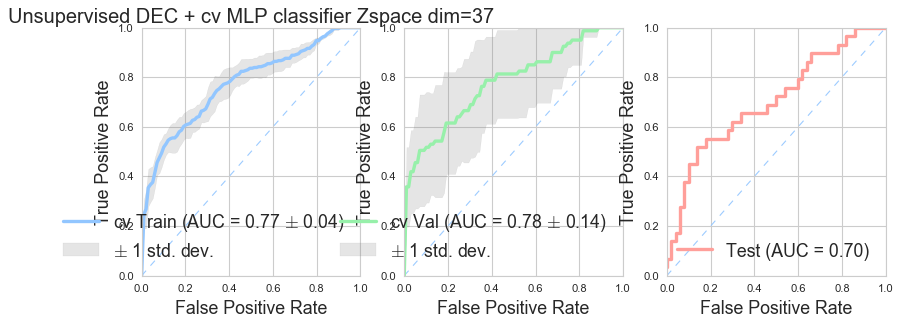

Loading autoencoder of znum = 34, mu = 4 , post training DEC results
DEC train init AUC = 0.651448306595
DEC train max meanAuc_cv = 0.675742721331 $\pm$ 0.113889179373
DEC validation AUC at max meanAuc_cv = 0.720689655172

... MLP fully coneected layer trained on Z_train tested on Z_test


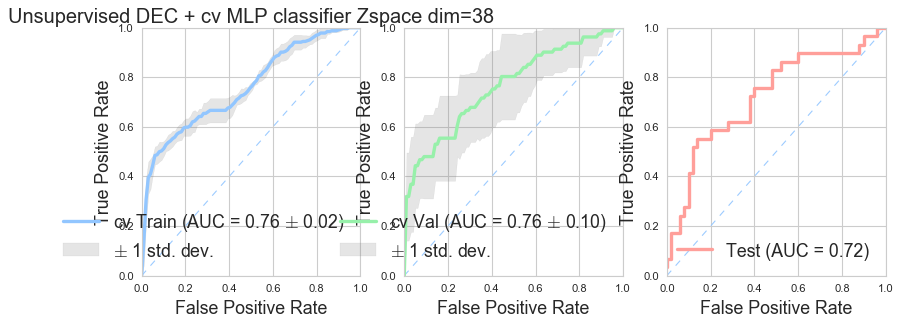

Loading autoencoder of znum = 34, mu = 5 , post training DEC results
DEC train init AUC = 0.629471182412
DEC train max meanAuc_cv = 0.719503862151 $\pm$ 0.0641157672004
DEC validation AUC at max meanAuc_cv = 0.727586206897

... MLP fully coneected layer trained on Z_train tested on Z_test


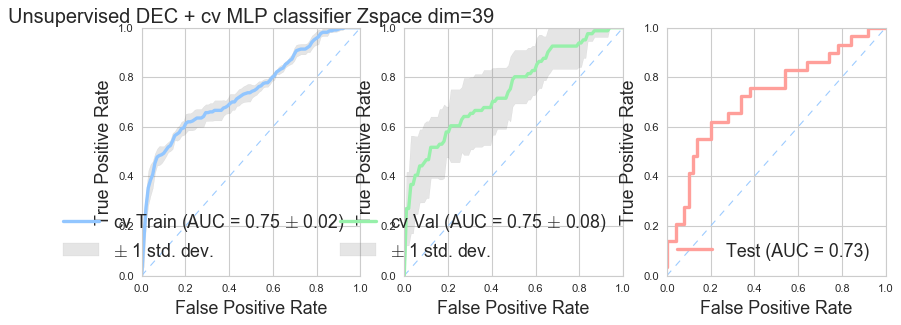

Loading autoencoder of znum = 34, mu = 6 , post training DEC results
DEC train init AUC = 0.639624183007
DEC train max meanAuc_cv = 0.695187165775 $\pm$ 0.111091464145
DEC validation AUC at max meanAuc_cv = 0.706206896552

... MLP fully coneected layer trained on Z_train tested on Z_test


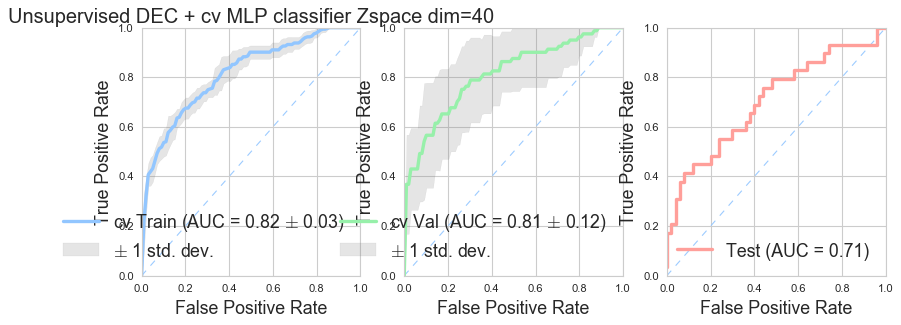

Loading autoencoder of znum = 34, mu = 7 , post training DEC results
DEC train init AUC = 0.633682412359
DEC train max meanAuc_cv = 0.701663695781 $\pm$ 0.111138303625
DEC validation AUC at max meanAuc_cv = 0.738620689655

... MLP fully coneected layer trained on Z_train tested on Z_test


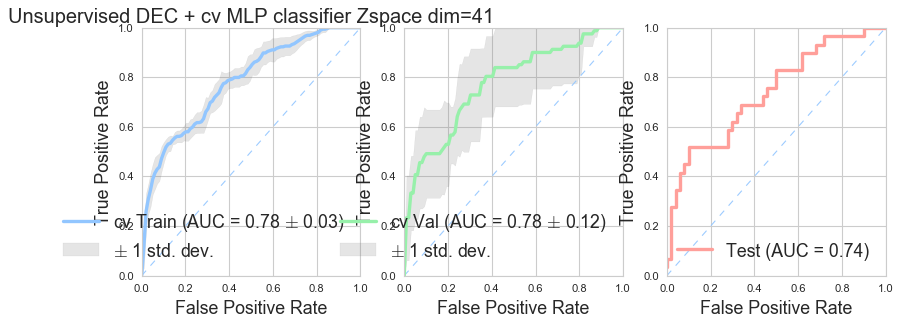

Loading autoencoder of znum = 34, mu = 8 , post training DEC results
DEC train init AUC = 0.627450980392
DEC train max meanAuc_cv = 0.700081699346 $\pm$ 0.107304163774
DEC validation AUC at max meanAuc_cv = 0.739310344828

... MLP fully coneected layer trained on Z_train tested on Z_test


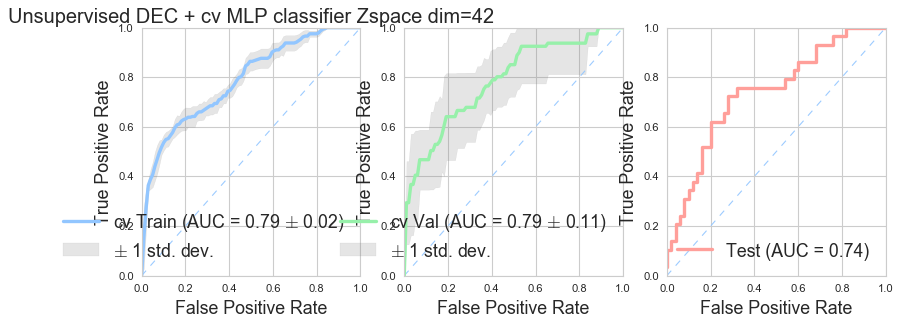

Loading autoencoder of znum = 34, mu = 9 , post training DEC results
DEC train init AUC = 0.625757575758
DEC train max meanAuc_cv = 0.719273618538 $\pm$ 0.095940320071
DEC validation AUC at max meanAuc_cv = 0.76275862069

... MLP fully coneected layer trained on Z_train tested on Z_test


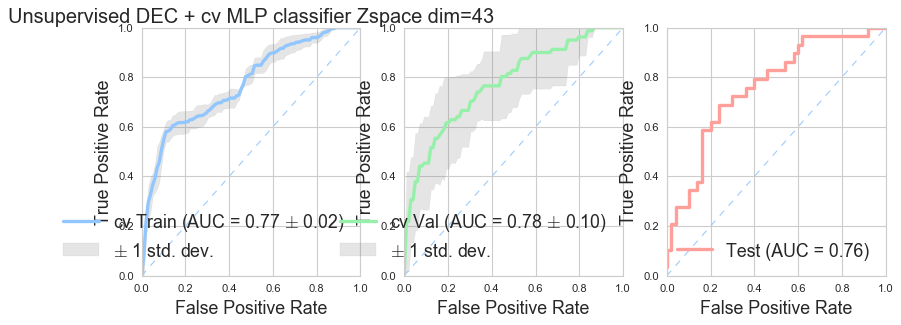

Loading autoencoder of znum = 34, mu = 10 , post training DEC results
DEC train init AUC = 0.634826203209
DEC train max meanAuc_cv = 0.697898098633 $\pm$ 0.121962937207
DEC validation AUC at max meanAuc_cv = 0.743448275862

... MLP fully coneected layer trained on Z_train tested on Z_test


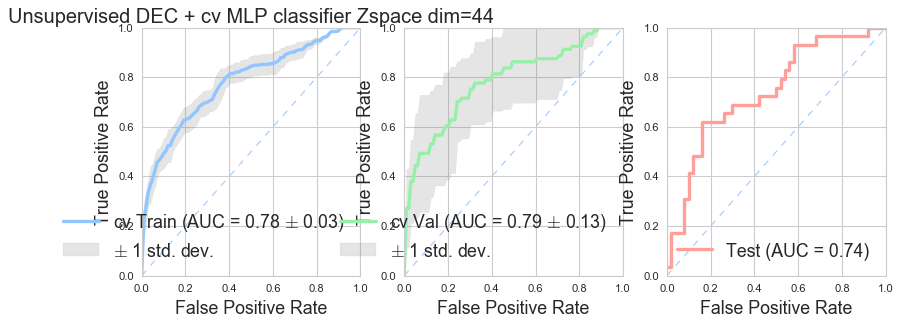

Loading autoencoder of znum = 34, mu = 11 , post training DEC results
DEC train init AUC = 0.599903446227
DEC train max meanAuc_cv = 0.699242424242 $\pm$ 0.0918815625092
DEC validation AUC at max meanAuc_cv = 0.661379310345

... MLP fully coneected layer trained on Z_train tested on Z_test


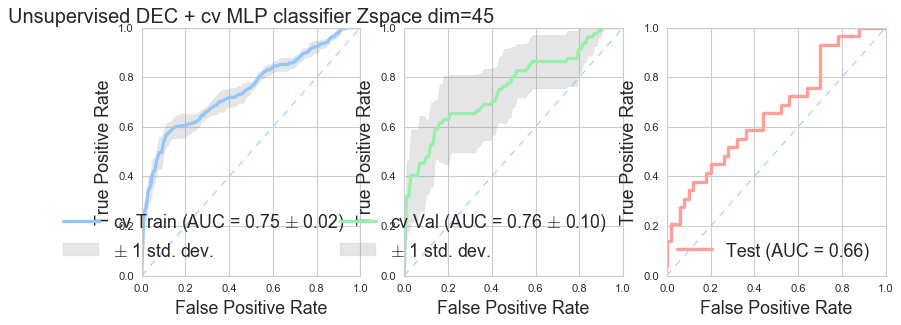

Loading autoencoder of znum = 34, mu = 12 , post training DEC results
DEC train init AUC = 0.628810160428
DEC train max meanAuc_cv = 0.706409685086 $\pm$ 0.103465332661
DEC validation AUC at max meanAuc_cv = 0.717931034483

... MLP fully coneected layer trained on Z_train tested on Z_test


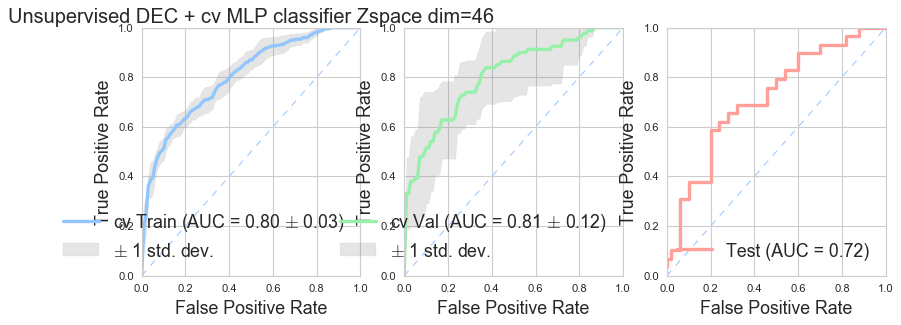

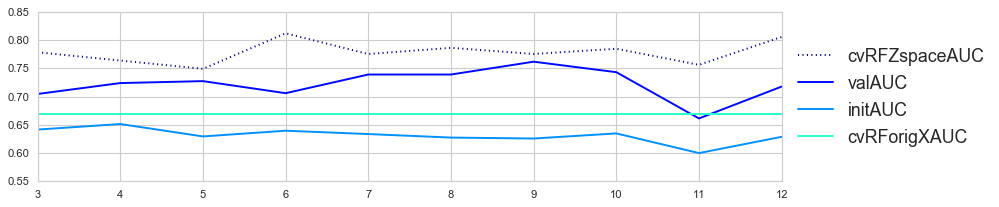

In [7]:
from decModel_wimgF_dualopt_descStats import *
labeltype = 'wimgF_dualopt_descStats_saveparams' 
save_to = r'Z:\Cristina\Section3\NME_DEC\SAEmodels\decModel_wimgF_dualopt_descStats_saveparams'

# to load a prevously DEC model  
input_size = combX_allNME.shape[1]
latent_size = [input_size/rxf for rxf in [2,5,10,15]]
varying_mu = [int(np.round(var_mu)) for var_mu in np.linspace(3,12,10)]

scoresM = np.zeros((len(latent_size),len(varying_mu),5))
scoresM_titles=[]

sns.set_color_codes("pastel")

######################
# DEC: define num_centers according to clustering variable
######################   
# to load a prevously DEC model  
for ik,znum in enumerate(latent_size):
    cvRForigXAUC = []
    initAUC = []
    valAUC = []
    cvRFZspaceAUC = [] 
    normalizedMI = []
    for ic,num_centers in enumerate(varying_mu): 
        X = combX_allNME
        y = roi_labels
        y_train_roi_labels = np.asarray(y)

        print('Loading autoencoder of znum = {}, mu = {} , post training DEC results'.format(znum,num_centers))
        dec_model = DECModel(mx.cpu(), X, num_centers, 1.0, znum, 'Z:\\Cristina\\Section3\\NME_DEC\\SAEmodels') 

        with gzip.open(os.path.join(save_to,'dec_model_z{}_mu{}_{}.arg'.format(znum,num_centers,labeltype)), 'rb') as fu:
            dec_model = pickle.load(fu)
          
        with gzip.open(os.path.join(save_to,'outdict_z{}_mu{}_{}.arg'.format(znum,num_centers,labeltype)), 'rb') as fu:
            outdict = pickle.load(fu)
        
        print('DEC train init AUC = {}'.format(outdict['meanAuc_cv'][0]))
        max_meanAuc_cv = outdict['meanAuc_cv'][-1]
        indmax_meanAuc_cv = outdict['meanAuc_cv'].index(max_meanAuc_cv)
        print r'DEC train max meanAuc_cv = {} $\pm$ {}'.format(max_meanAuc_cv,dec_model['std_auc'][indmax_meanAuc_cv])
        print('DEC validation AUC at max meanAuc_cv = {}'.format(outdict['auc_val'][indmax_meanAuc_cv]))
        
        #####################
        # extract Z-space from optimal DEC model
        #####################
        # saved output results
        dec_args_keys = ['encoder_1_bias', 'encoder_3_weight', 'encoder_0_weight', 
        'encoder_0_bias', 'encoder_2_weight', 'encoder_1_weight', 
        'encoder_3_bias', 'encoder_2_bias']
        dec_args = {key: v for key, v in dec_model.items() if key in dec_args_keys}
        dec_args['dec_mubestacci'] = dec_model['dec_mu']
        
        N = X.shape[0]
        all_iter = mx.io.NDArrayIter({'data': X}, batch_size=X.shape[0], shuffle=False,
                                                  last_batch_handle='pad')   
        ## extract embedded point zi 
        mxdec_args = {key: mx.nd.array(v) for key, v in dec_args.items() if key != 'dec_mubestacci'}                           
        aDEC = DECModel(mx.cpu(), X, num_centers, 1.0, znum, 'Z:\\Cristina\\Section3\\NME_DEC\\SAEmodels') 
        
        # organize weights and biases
        l1=[v.asnumpy().shape for k,v in aDEC.ae_model.args.iteritems()]
        k1=[k for k,v in aDEC.ae_model.args.iteritems()]
        l2=[v.asnumpy().shape for k,v in mxdec_args.iteritems()]
        k2=[k for k,v in mxdec_args.iteritems()]

        for ikparam,sizeparam in enumerate(l1):
            for jkparam,savedparam in enumerate(l2):
                if(sizeparam == savedparam):
                    #print('updating layer parameters: {}'.format(savedparam))
                    aDEC.ae_model.args[k1[ikparam]] = mxdec_args[k2[jkparam]]

        zbestacci = model.extract_feature(aDEC.feature, mxdec_args, None, all_iter, X.shape[0], aDEC.xpu).values()[0]      

        # compute model-based best-pbestacci or dec_model['pbestacci']
        pbestacci = np.zeros((zbestacci.shape[0], dec_model['num_centers']))
        aDEC.dec_op.forward([zbestacci, dec_args['dec_mubestacci'].asnumpy()], [pbestacci])
        #pbestacci = dec_model['pbestacci']
        
        # pool Z-space variables
        datalabels = np.asarray(y)
        dataZspace = np.concatenate((zbestacci, pbestacci), axis=1) 

        #####################
        # unbiased assessment: SPlit train/held-out test
        #####################
        # to compare performance need to discard unkown labels, only use known labels (only B or M)
        Z = dataZspace[datalabels!='K',:]
        y = datalabels[datalabels!='K']
      
        print '\n... MLP fully coneected layer trained on Z_train tested on Z_test' 
        sep = int(X.shape[0]*0.10)
        Z_test = Z[:sep]
        yZ_test = np.asanyarray(y[:sep]=='M').astype(int) 
        Z_train = Z[sep:]
        yZ_train = np.asanyarray(y[sep:]=='M').astype(int) 
       
        # We’ll load MLP using MXNet’s symbolic interface
        dataMLP = mx.sym.Variable('data')
        # MLP: two fully connected layers with 128 and 32 neurons each. 
        fc1  = mx.sym.FullyConnected(data=dataMLP, num_hidden = 128)
        act1 = mx.sym.Activation(data=fc1, act_type="relu")
        fc2  = mx.sym.FullyConnected(data=act1, num_hidden = 32)
        act2 = mx.sym.Activation(data=fc2, act_type="relu")
        # data has 2 classes
        fc3  = mx.sym.FullyConnected(data=act2, num_hidden=2)
        # Softmax output layer
        mlp  = mx.sym.SoftmaxOutput(data=fc3, name='softmax')
        # create a trainable module on CPU     
        batch_size = 50
        mlp_model = mx.mod.Module(symbol=mlp, context=mx.cpu())
        # pass train/test data to allocate model (bind state)
        MLP_train_iter = mx.io.NDArrayIter(Z_train, yZ_train, batch_size, shuffle=False)
        mlp_model.bind(MLP_train_iter.provide_data, MLP_train_iter.provide_label)
        mlp_model.init_params()   
        mlp_model.init_optimizer()
        mlp_model_params = mlp_model.get_params()[0]
        
        # update parameters based on optimal found during cv Training
        from mxnet import ndarray
        params_dict = ndarray.load(os.path.join(save_to,'mlp_model_params_z{}_mu{}.arg'.format(znum,num_centers)))
        arg_params = {}
        aux_params = {}
        for k, value in params_dict.items():
            arg_type, name = k.split(':', 1)
            if arg_type == 'arg':
                arg_params[name] = value
            elif arg_type == 'aux':
                aux_params[name] = value
            else:
                raise ValueError("Invalid param file ")

        # order of params: [(128L, 266L),(128L,),(32L, 128L),(32L,),(2L, 32L),(2L,)]
        # organize weights and biases
        l1=[v.asnumpy().shape for k,v in mlp_model_params.iteritems()]
        k1=[k for k,v in mlp_model_params.iteritems()]
        l2=[v.asnumpy().shape for k,v in arg_params.iteritems()]
        k2=[k for k,v in arg_params.iteritems()]

        for ikparam,sizeparam in enumerate(l1):
            for jkparam,savedparam in enumerate(l2):
                if(sizeparam == savedparam):
                    #print('updating layer parameters: {}'.format(savedparam))
                    mlp_model_params[k1[ikparam]] = arg_params[k2[jkparam]]
        # upddate model parameters
        mlp_model.set_params(mlp_model_params, aux_params)
        
        #####################
        # ROC: Z-space MLP fully coneected layer for classification
        #####################
        figROCs = plt.figure(figsize=(12,4))    
        # Run classifier with cross-validation and plot ROC curves
        cv = StratifiedKFold(n_splits=5,random_state=3)
        # Evaluate a score by cross-validation
        tprs_train = []; aucs_train = []
        tprs_val = []; aucs_val = []
        mean_fpr = np.linspace(0, 1, 100)
        cvi = 0
        for train, test in cv.split(Z_train, yZ_train):
            ############### on train
            MLP_train_iter = mx.io.NDArrayIter(Z_train[train], yZ_train[train], batch_size)  
            # prob[i][j] is the probability that the i-th validation contains the j-th output class.
            prob_train = mlp_model.predict(MLP_train_iter)
            # Compute ROC curve and area the curve
            fpr_train, tpr_train, thresholds_train = roc_curve(yZ_train[train], prob_train.asnumpy()[:,1])
            # to create an ROC with 100 pts
            tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
            tprs_train[-1][0] = 0.0
            roc_auc = auc(fpr_train, tpr_train)
            aucs_train.append(roc_auc)
            
            ############### on validation
            MLP_val_iter = mx.io.NDArrayIter(Z_train[test], yZ_train[test], batch_size)    
            # prob[i][j] is the probability that the i-th validation contains the j-th output class.
            prob_val = mlp_model.predict(MLP_val_iter)
            # Compute ROC curve and area the curve
            fpr_val, tpr_val, thresholds_val = roc_curve(yZ_train[test], prob_val.asnumpy()[:,1])
            # to create an ROC with 100 pts
            tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
            tprs_val[-1][0] = 0.0
            roc_auc = auc(fpr_val, tpr_val)
            aucs_val.append(roc_auc)
            # plot
            #axaroc.plot(fpr, tpr, lw=1, alpha=0.6) # with label add: label='cv %d, AUC %0.2f' % (cvi, roc_auc)
            cvi += 1
           
        # plot for cv Train
        axaroc_train = figROCs.add_subplot(1,3,1)
        # add 50% or chance line
        axaroc_train.plot([0, 1], [0, 1], linestyle='--', lw=1, color='b', alpha=.9)
        # plot mean and +- 1 -std as fill area
        mean_tpr_train = np.mean(tprs_train, axis=0)
        mean_tpr_train[-1] = 1.0
        mean_auc_train = auc(mean_fpr, mean_tpr_train)
        std_auc_train = np.std(aucs_train)
        axaroc_train.plot(mean_fpr, mean_tpr_train, color='b',
                    label=r'cv Train (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_train, std_auc_train),lw=3, alpha=1)     
        std_tpr = np.std(tprs_train, axis=0)
        tprs_upper = np.minimum(mean_tpr_train + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr_train - std_tpr, 0)
        axaroc_train.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.') 
        # set labels
        axaroc_train.set_xlabel('False Positive Rate',fontsize=16)
        axaroc_train.set_ylabel('True Positive Rate',fontsize=16)
        axaroc_train.set_title('Unsupervised DEC + cv MLP classifier Zspace dim={}'.format(Z.shape[1]),fontsize=18)
        axaroc_train.legend(loc="lower right",fontsize=16)
        
        # plot for cv val
        axaroc_val = figROCs.add_subplot(1,3,2)
        # add 50% or chance line
        axaroc_val.plot([0, 1], [0, 1], linestyle='--', lw=1, color='b', alpha=.9)
        # plot mean and +- 1 -std as fill area
        mean_tpr_val = np.mean(tprs_val, axis=0)
        mean_tpr_val[-1] = 1.0
        mean_auc_val = auc(mean_fpr, mean_tpr_val)
        std_auc_val = np.std(aucs_val)
        axaroc_val.plot(mean_fpr, mean_tpr_val, color='g',
                    label=r'cv Val (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_val, std_auc_val),lw=3, alpha=1)     
        std_tpr = np.std(tprs_val, axis=0)
        tprs_upper = np.minimum(mean_tpr_val + std_tpr, 1)
        tprs_lower = np.maximum(mean_tpr_val - std_tpr, 0)
        axaroc_val.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.') 
        # set labels
        axaroc_val.set_xlabel('False Positive Rate',fontsize=16)
        axaroc_val.set_ylabel('True Positive Rate',fontsize=16)
        #axaroc_val.set_title('Unsupervised DEC + cv MLP classifier Zspace dim={}'.format(Z.shape[1]),fontsize=14)
        axaroc_val.legend(loc="lower right",fontsize=16)
        
        ################
        # plot AUC on heldout set
        ################
        MLP_heldout_iter = mx.io.NDArrayIter(Z_test, None, batch_size)   
        probas_heldout = mlp_model.predict(MLP_heldout_iter)
           
        # plot for cv val
        axaroc_test = figROCs.add_subplot(1,3,3)
        # add 50% or chance line
        axaroc_test.plot([0, 1], [0, 1], linestyle='--', lw=1, color='b', alpha=.9)
        # Compute ROC curve and area the curve
        fpr_test, tpr_test, thresholds_test = roc_curve(yZ_test, probas_heldout.asnumpy()[:, 1])
        auc_test = auc(fpr_test, tpr_test)
        axaroc_test.plot(fpr_test, tpr_test, color='r',
                    label=r'Test (AUC = %0.2f)' % (auc_test),lw=3, alpha=1)     
        # set labels            
        axaroc_test.set_xlabel('False Positive Rate',fontsize=16)
        axaroc_test.set_ylabel('True Positive Rate',fontsize=16)
        #axaroc.set_title('ROC LD DEC optimized space={}, all features={} - Unsupervised DEC + cv MLP classifier'.format(Z.shape[0],Z.shape[1]),fontsize=18)
        axaroc_test.legend(loc="lower right",fontsize=16)
        plt.show()
    
        ############# append to 
        cvRForigXAUC.append(0.67)
        initAUC.append(dec_model['meanAuc_cv'][0])
        cvRFZspaceAUC.append(mean_auc_val)
        valAUC.append(auc_test)
        
        scoresM[ik,ic,0] = mean_auc_train
        scoresM_titles.append("DEC cv mean_auc_train")
        scoresM[ik,ic,1] = std_auc_train
        scoresM_titles.append("DEC cv std_auc_train")    
        scoresM[ik,ic,2] = mean_auc_val
        scoresM_titles.append("DEC cv mean_auc_val")
        scoresM[ik,ic,3] = std_auc_val
        scoresM_titles.append("DEC cv std_auc_val")       
        scoresM[ik,ic,4] = auc_test
        scoresM_titles.append("DEC heal-out test AUC")          
 
        
    # plot latent space Accuracies vs. original
    colors = plt.cm.jet(np.linspace(0, 1, 16))
    fig2 = plt.figure(figsize=(12,6))
    #ax2 = plt.axes()
    sns.set_context("notebook")
    ax1 = fig2.add_subplot(2,1,1)
    ax1.plot(varying_mu, cvRFZspaceAUC, color=colors[0], ls=':', label='cvRFZspaceAUC')
    ax1.plot(varying_mu, valAUC, color=colors[2], label='valAUC')
    ax1.plot(varying_mu, initAUC, color=colors[4], label='initAUC')
    ax1.plot(varying_mu, cvRForigXAUC, color=colors[6], label='cvRForigXAUC')
    h1, l1 = ax1.get_legend_handles_labels()
    ax1.legend(h1, l1, loc='center left', bbox_to_anchor=(1, 0.5), prop={'size':16})
     

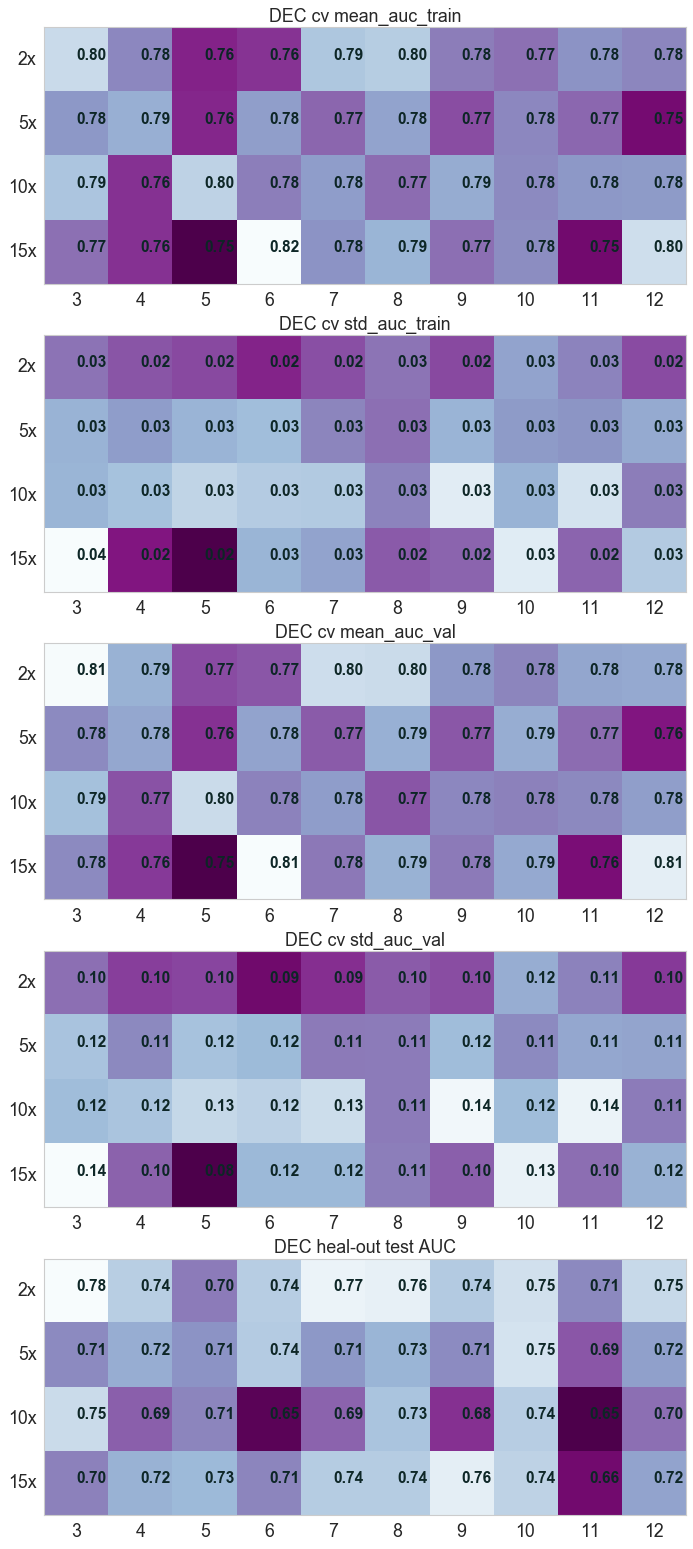

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FixedLocator, FormatStrFormatter
import matplotlib.cm

figscoresM, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 24)) 
for k,ax in enumerate(axes.flat):
    im = ax.imshow(scoresM[:,:,k], cmap='BuPu_r', interpolation='nearest')
    ax.grid(False)
    for u in range(len(latent_size)):        
        for v in range(len(varying_mu)):
            ax.text(v,u,'{:.2f}'.format(scoresM[u,v,k]), color=np.array([0.05,0.15,0.15,1]),
                         fontdict={'weight': 'bold', 'size': 14})
    # set ticks
    ax.xaxis.set_major_locator(FixedLocator(np.linspace(0,9,10)))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    
    mu_labels = [str(mu) for mu in varying_mu]
    ax.set_xticklabels(mu_labels, minor=False,fontsize=16)
    ax.yaxis.set_major_locator(FixedLocator(np.linspace(0,3,4)))
    ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.yaxis.set_minor_locator(MultipleLocator(2))
    
    znum_labels = ['2x','5x','10x','15x',] #[str(znum) for znum in latent_size]
    ax.set_yticklabels(znum_labels, minor=False,fontsize=16)
    ax.xaxis.set_label('latent space reduction')
    ax.yaxis.set_label('# cluster centroids')
    ax.set_title(scoresM_titles[k],fontsize=16)

##################################################################
## Find best performing parameters
################################################################## 

original input space = 523


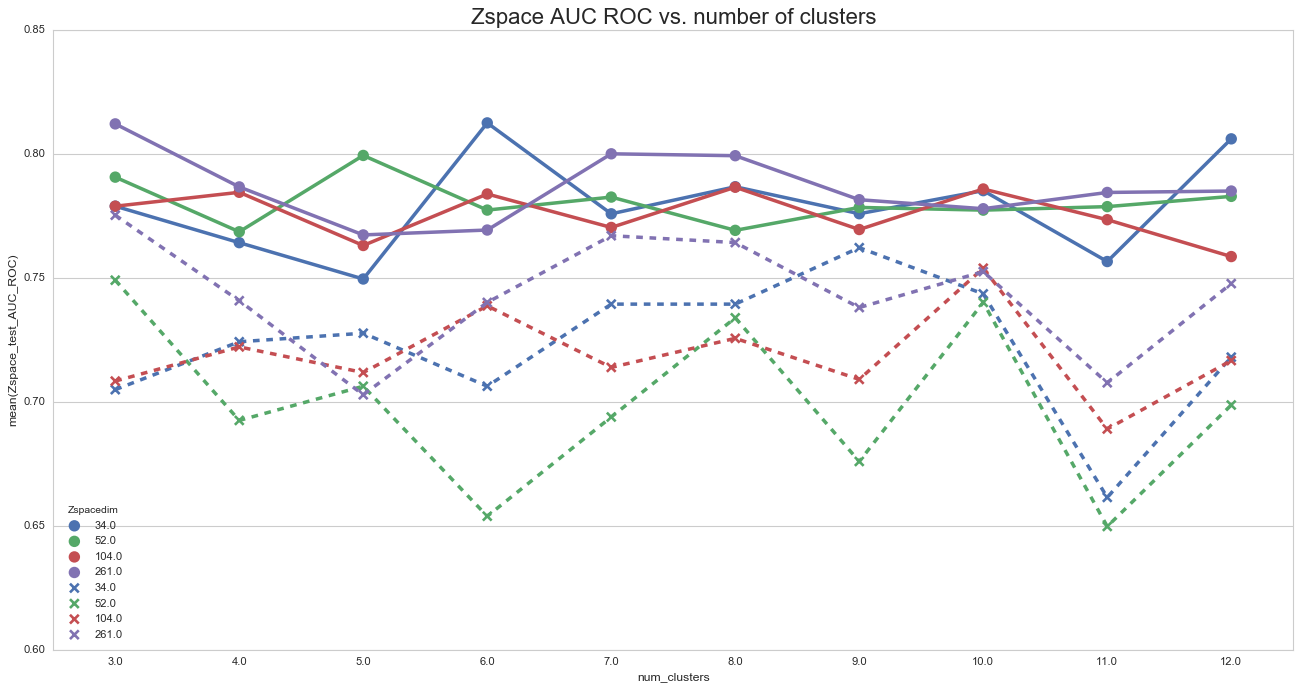

In [9]:
input_size = combX_allNME.shape[1]
print "original input space = %d" % input_size 
dict_aucZlatent = pd.DataFrame() 
for k,znum in enumerate(latent_size):
    for l,num_c in enumerate(varying_mu):
        dict_aucZlatent = dict_aucZlatent.append( pd.Series({'Zspacedim':znum, 
                                                             'Zspace_AUC_ROC': scoresM[k,l,2], 
                                                              'Zspace_test_AUC_ROC': scoresM[k,l,4], 
                                                             'num_clusters':num_c}), ignore_index=True)
fig2 = plt.figure(figsize=(20,10))
ax2 = plt.axes()
sns.set_context("notebook")  
sns.pointplot(x="num_clusters", y="Zspace_AUC_ROC", hue="Zspacedim", data=dict_aucZlatent, ax=ax2, size=0.05) 
sns.pointplot(x="num_clusters", y="Zspace_test_AUC_ROC", hue="Zspacedim", data=dict_aucZlatent, ax=ax2, size=0.05, markers=["x","x","x","x"],linestyles=["--","--","--","--"]) 
ax2.xaxis.set_label('# clusters')
ax2.yaxis.set_label('Zspace AUC ROC')
ax2.set_title('Zspace AUC ROC vs. number of clusters',fontsize=20)



In [10]:
# plot box plots
dict_aucZlatent['Zspacedim_cats'] = pd.Series(dict_aucZlatent['Zspacedim'], dtype="category")
dict_aucZlatent['num_clusters_cats'] = pd.Series(dict_aucZlatent['num_clusters'], dtype="category")
print dict_aucZlatent

    Zspace_AUC_ROC  Zspace_test_AUC_ROC  Zspacedim  num_clusters  \
0         0.811988             0.775172        261             3   
1         0.786579             0.740690        261             4   
2         0.767216             0.702759        261             5   
3         0.769192             0.740000        261             6   
4         0.799926             0.766897        261             7   
5         0.799161             0.764138        261             8   
6         0.781417             0.737931        261             9   
7         0.777778             0.752414        261            10   
8         0.784343             0.707586        261            11   
9         0.784915             0.747586        261            12   
10        0.778788             0.708276        104             3   
11        0.784403             0.722069        104             4   
12        0.762953             0.711724        104             5   
13        0.783727             0.738621        1

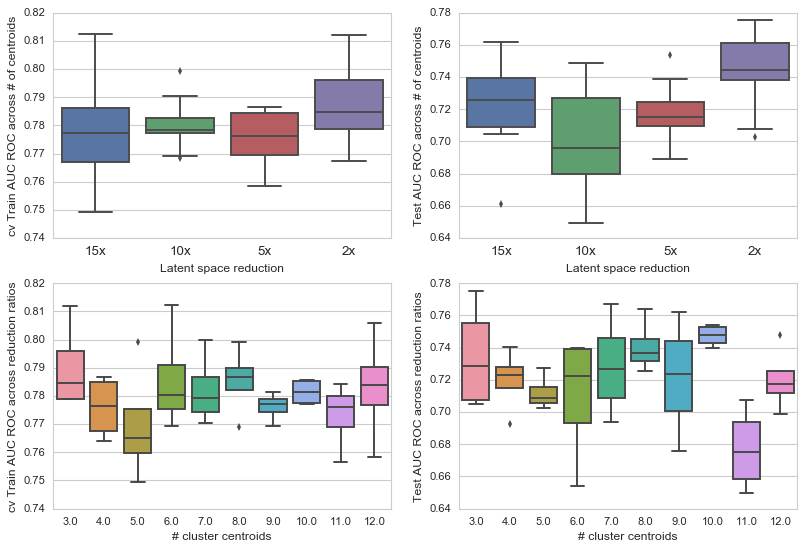

In [11]:
sns.set_color_codes("pastel")
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,2,1)
sns.boxplot(y="Zspace_AUC_ROC", x="Zspacedim_cats", data=dict_aucZlatent, ax=ax1)
znum_labels = ['15x','10x','5x','2x'] 
ax1.set_xticklabels(znum_labels, minor=False,fontsize=12)
ax1.set_xlabel('Latent space reduction')
ax1.set_ylabel('cv Train AUC ROC across # of centroids')

ax2 = fig.add_subplot(2,2,3)
sns.boxplot(y="Zspace_AUC_ROC", x="num_clusters_cats", data=dict_aucZlatent, ax=ax2)
ax2.set_xlabel('# cluster centroids')
ax2.set_ylabel('cv Train AUC ROC across reduction ratios')

ax3 = fig.add_subplot(2,2,2)
sns.boxplot(y="Zspace_test_AUC_ROC", x="Zspacedim_cats", data=dict_aucZlatent, ax=ax3)
ax3.set_xticklabels(znum_labels, minor=False,fontsize=12)
ax3.set_xlabel('Latent space reduction')
ax3.set_ylabel('Test AUC ROC across # of centroids')

ax4 = fig.add_subplot(2,2,4)
sns.boxplot(y="Zspace_test_AUC_ROC", x="num_clusters_cats", data=dict_aucZlatent, ax=ax4)
ax4.set_xlabel('# cluster centroids')
ax4.set_ylabel('Test AUC ROC across reduction ratios')


In [22]:
# find best performing by the average of broth train and test performance
max_aucZlatent = np.max(dict_aucZlatent[["Zspace_AUC_ROC", "Zspace_test_AUC_ROC"]].mean(axis=1))
indmax_meanAuc_cv = dict_aucZlatent[["Zspace_AUC_ROC", "Zspace_test_AUC_ROC"]].mean(axis=1) == max_aucZlatent
print "\n================== Best average train/test perfomance parameters:" 
bestperf_params = dict_aucZlatent[indmax_meanAuc_cv]
print bestperf_params



================== Best average train/test perfomance parameters:
   Zspace_AUC_ROC  Zspace_test_AUC_ROC  Zspacedim  num_clusters  \
0        0.811988             0.775172        261             3   

  Zspacedim_cats num_clusters_cats  
0            261                 3  


Loading autoencoder of Zspacedim_best = 261, mu = 3 , post training DEC results

... MLP fully coneected layer trained on Z_train tested on Z_test


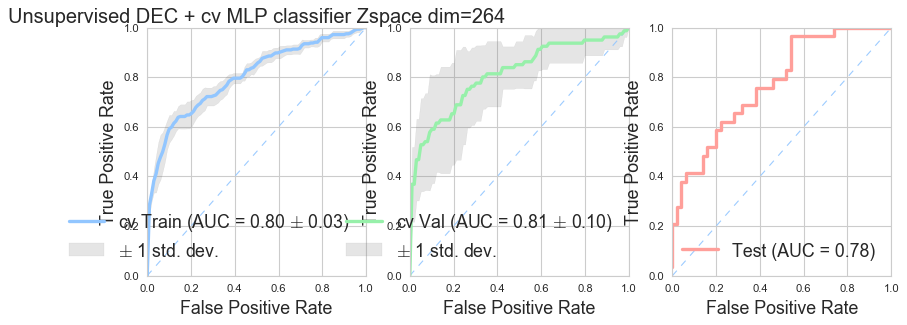

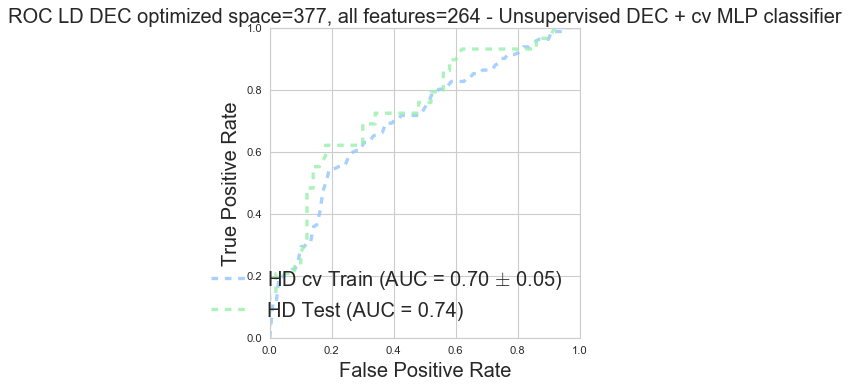

In [13]:
################################################################## 
Zspacedim_best = int(bestperf_params.iloc[0]['Zspacedim'])
num_clusters_best = int(bestperf_params.iloc[0]['num_clusters'])

print('Loading autoencoder of Zspacedim_best = {}, mu = {} , post training DEC results'.format(Zspacedim_best,num_clusters_best))
dec_model = DECModel(mx.cpu(), X, num_clusters_best, 1.0, Zspacedim_best, 'Z:\\Cristina\\Section3\\NME_DEC\\SAEmodels') 

with gzip.open(os.path.join(save_to,'dec_model_z{}_mu{}_{}.arg'.format(Zspacedim_best,num_clusters_best,labeltype)), 'rb') as fu:
    dec_model = pickle.load(fu)
  
with gzip.open(os.path.join(save_to,'outdict_z{}_mu{}_{}.arg'.format(Zspacedim_best,num_clusters_best,labeltype)), 'rb') as fu:
    outdict = pickle.load(fu)

#####################
# extract Z-space from optimal DEC model
#####################
# saved output results
X = combX_allNME
y = roi_labels

dec_args_keys = ['encoder_1_bias', 'encoder_3_weight', 'encoder_0_weight', 
'encoder_0_bias', 'encoder_2_weight', 'encoder_1_weight', 
'encoder_3_bias', 'encoder_2_bias']
dec_args = {key: v for key, v in dec_model.items() if key in dec_args_keys}
dec_args['dec_mubestacci'] = dec_model['dec_mu']

N = X.shape[0]
all_iter = mx.io.NDArrayIter({'data': X}, batch_size=X.shape[0], shuffle=False,
                                          last_batch_handle='pad')   
## extract embedded point zi 
mxdec_args = {key: mx.nd.array(v) for key, v in dec_args.items() if key != 'dec_mubestacci'}                           
aDEC = DECModel(mx.cpu(), X, num_clusters_best, 1.0, Zspacedim_best, 'Z:\\Cristina\\Section3\\NME_DEC\\SAEmodels') 

# organize weights and biases
l1=[v.asnumpy().shape for k,v in aDEC.ae_model.args.iteritems()]
k1=[k for k,v in aDEC.ae_model.args.iteritems()]
l2=[v.asnumpy().shape for k,v in mxdec_args.iteritems()]
k2=[k for k,v in mxdec_args.iteritems()]

for ikparam,sizeparam in enumerate(l1):
    for jkparam,savedparam in enumerate(l2):
        if(sizeparam == savedparam):
            #print('updating layer parameters: {}'.format(savedparam))
            aDEC.ae_model.args[k1[ikparam]] = mxdec_args[k2[jkparam]]

zbestacci = model.extract_feature(aDEC.feature, mxdec_args, None, all_iter, X.shape[0], aDEC.xpu).values()[0]      
# compute model-based best-pbestacci or dec_model['pbestacci']
pbestacci = np.zeros((zbestacci.shape[0], dec_model['num_centers']))
aDEC.dec_op.forward([zbestacci, dec_args['dec_mubestacci'].asnumpy()], [pbestacci])
#pbestacci = dec_model['pbestacci']

# pool Z-space variables
datalabels = np.asarray(y)
dataZspace = np.concatenate((zbestacci, pbestacci), axis=1) 

#####################
# unbiased assessment: SPlit train/held-out test
#####################
# to compare performance need to discard unkown labels, only use known labels (only B or M)
Z = dataZspace[datalabels!='K',:]
y = datalabels[datalabels!='K']
  
print '\n... MLP fully coneected layer trained on Z_train tested on Z_test' 
sep = int(X.shape[0]*0.10)
Z_test = Z[:sep]
yZ_test = np.asanyarray(y[:sep]=='M').astype(int) 
Z_train = Z[sep:]
yZ_train = np.asanyarray(y[sep:]=='M').astype(int) 
   
# We’ll load MLP using MXNet’s symbolic interface
dataMLP = mx.sym.Variable('data')
# MLP: two fully connected layers with 128 and 32 neurons each. 
fc1  = mx.sym.FullyConnected(data=dataMLP, num_hidden = 128)
act1 = mx.sym.Activation(data=fc1, act_type="relu")
fc2  = mx.sym.FullyConnected(data=act1, num_hidden = 32)
act2 = mx.sym.Activation(data=fc2, act_type="relu")
# data has 2 classes
fc3  = mx.sym.FullyConnected(data=act2, num_hidden=2)
# Softmax output layer
mlp  = mx.sym.SoftmaxOutput(data=fc3, name='softmax')
# create a trainable module on CPU     
batch_size = 50
mlp_model = mx.mod.Module(symbol=mlp, context=mx.cpu())
# pass train/test data to allocate model (bind state)
MLP_train_iter = mx.io.NDArrayIter(Z_train, yZ_train, batch_size, shuffle=False)
mlp_model.bind(MLP_train_iter.provide_data, MLP_train_iter.provide_label)
mlp_model.init_params()   
mlp_model_params = mlp_model.get_params()[0]

# update parameters based on optimal found during cv Training
from mxnet import ndarray
params_dict = ndarray.load(os.path.join(save_to,'mlp_model_params_z{}_mu{}.arg'.format(Zspacedim_best,num_clusters_best)))
arg_params = {}
aux_params = {}
for k, value in params_dict.items():
    arg_type, name = k.split(':', 1)
    if arg_type == 'arg':
        arg_params[name] = value
    elif arg_type == 'aux':
        aux_params[name] = value
    else:
        raise ValueError("Invalid param file ")

# order of params: [(128L, 266L),(128L,),(32L, 128L),(32L,),(2L, 32L),(2L,)]
# organize weights and biases
l1=[v.asnumpy().shape for k,v in mlp_model_params.iteritems()]
k1=[k for k,v in mlp_model_params.iteritems()]
l2=[v.asnumpy().shape for k,v in arg_params.iteritems()]
k2=[k for k,v in arg_params.iteritems()]

for ikparam,sizeparam in enumerate(l1):
    for jkparam,savedparam in enumerate(l2):
        if(sizeparam == savedparam):
            #print('updating layer parameters: {}'.format(savedparam))
            mlp_model_params[k1[ikparam]] = arg_params[k2[jkparam]]
# upddate model parameters
mlp_model.set_params(mlp_model_params, aux_params)


figROCs = plt.figure(figsize=(12,4))    
# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5,random_state=3)
# Evaluate a score by cross-validation
tprs_train = []; aucs_train = []
tprs_val = []; aucs_val = []
mean_fpr = np.linspace(0, 1, 100)
## to append pooled predictions
pooled_pred_train = pd.DataFrame()
pooled_pred_val = pd.DataFrame()
cvi = 0
for train, test in cv.split(Z_train, yZ_train):
    ############### on train
    MLP_train_iter = mx.io.NDArrayIter(Z_train[train], yZ_train[train], batch_size)  
    # prob[i][j] is the probability that the i-th validation contains the j-th output class.
    prob_train = mlp_model.predict(MLP_train_iter)
    # Compute ROC curve and area the curve
    fpr_train, tpr_train, thresholds_train = roc_curve(yZ_train[train], prob_train.asnumpy()[:,1])
    # to create an ROC with 100 pts
    tprs_train.append(interp(mean_fpr, fpr_train, tpr_train))
    tprs_train[-1][0] = 0.0
    roc_auc = auc(fpr_train, tpr_train)
    aucs_train.append(roc_auc)
    
    ############### on validation
    MLP_val_iter = mx.io.NDArrayIter(Z_train[test], yZ_train[test], batch_size)    
    # prob[i][j] is the probability that the i-th validation contains the j-th output class.
    prob_val = mlp_model.predict(MLP_val_iter)
    # Compute ROC curve and area the curve
    fpr_val, tpr_val, thresholds_val = roc_curve(yZ_train[test], prob_val.asnumpy()[:,1])
    # to create an ROC with 100 pts
    tprs_val.append(interp(mean_fpr, fpr_val, tpr_val))
    tprs_val[-1][0] = 0.0
    roc_auc = auc(fpr_val, tpr_val)
    aucs_val.append(roc_auc)
    # plot
    #axaroc.plot(fpr, tpr, lw=1, alpha=0.6) # with label add: label='cv %d, AUC %0.2f' % (cvi, roc_auc)
    cvi += 1
    ## appends
    pooled_pred_train = pooled_pred_train.append( pd.DataFrame({"labels":yZ_train[train],
                          "probC":prob_train.asnumpy()[:,1],
                          "probNC":prob_train.asnumpy()[:,0]}), ignore_index=True)

    pooled_pred_val = pooled_pred_val.append( pd.DataFrame({"labels":yZ_train[test],
                          "probC":prob_val.asnumpy()[:,1],
                          "probNC":prob_val.asnumpy()[:,0]}), ignore_index=True)
                          
# plot for cv Train
axaroc_train = figROCs.add_subplot(1,3,1)
# add 50% or chance line
axaroc_train.plot([0, 1], [0, 1], linestyle='--', lw=1, color='b', alpha=.9)
# plot mean and +- 1 -std as fill area
mean_tpr_train = np.mean(tprs_train, axis=0)
mean_tpr_train[-1] = 1.0
mean_auc_train = auc(mean_fpr, mean_tpr_train)
std_auc_train = np.std(aucs_train)
axaroc_train.plot(mean_fpr, mean_tpr_train, color='b',
            label=r'cv Train (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_train, std_auc_train),lw=3, alpha=1)     
std_tpr = np.std(tprs_train, axis=0)
tprs_upper = np.minimum(mean_tpr_train + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr_train - std_tpr, 0)
axaroc_train.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.') 
# set labels
axaroc_train.set_xlabel('False Positive Rate',fontsize=16)
axaroc_train.set_ylabel('True Positive Rate',fontsize=16)
axaroc_train.set_title('Unsupervised DEC + cv MLP classifier Zspace dim={}'.format(Z.shape[1]),fontsize=18)
axaroc_train.legend(loc="lower right",fontsize=16)

# plot for cv val
axaroc_val = figROCs.add_subplot(1,3,2)
# add 50% or chance line
axaroc_val.plot([0, 1], [0, 1], linestyle='--', lw=1, color='b', alpha=.9)
# plot mean and +- 1 -std as fill area
mean_tpr_val = np.mean(tprs_val, axis=0)
mean_tpr_val[-1] = 1.0
mean_auc_val = auc(mean_fpr, mean_tpr_val)
std_auc_val = np.std(aucs_val)
axaroc_val.plot(mean_fpr, mean_tpr_val, color='g',
            label=r'cv Val (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_val, std_auc_val),lw=3, alpha=1)     
std_tpr = np.std(tprs_val, axis=0)
tprs_upper = np.minimum(mean_tpr_val + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr_val - std_tpr, 0)
axaroc_val.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.') 
# set labels
axaroc_val.set_xlabel('False Positive Rate',fontsize=16)
axaroc_val.set_ylabel('True Positive Rate',fontsize=16)
#axaroc_val.set_title('Unsupervised DEC + cv MLP classifier Zspace dim={}'.format(Z.shape[1]),fontsize=14)
axaroc_val.legend(loc="lower right",fontsize=16)

################
# plot AUC on heldout set
################
MLP_heldout_iter = mx.io.NDArrayIter(Z_test, None, batch_size)   
probas_heldout = mlp_model.predict(MLP_heldout_iter)
   
# plot for cv val
axaroc_test = figROCs.add_subplot(1,3,3)
# add 50% or chance line
axaroc_test.plot([0, 1], [0, 1], linestyle='--', lw=1, color='b', alpha=.9)
# Compute ROC curve and area the curve
fpr_test, tpr_test, thresholds_test = roc_curve(yZ_test, probas_heldout.asnumpy()[:, 1])
auc_test = auc(fpr_test, tpr_test)
axaroc_test.plot(fpr_test, tpr_test, color='r',
            label=r'Test (AUC = %0.2f)' % (auc_test),lw=3, alpha=1)     
# set labels            
axaroc_test.set_xlabel('False Positive Rate',fontsize=16)
axaroc_test.set_ylabel('True Positive Rate',fontsize=16)
#axaroc.set_title('ROC LD DEC optimized space={}, all features={} - Unsupervised DEC + cv MLP classifier'.format(Z.shape[0],Z.shape[1]),fontsize=18)
axaroc_test.legend(loc="lower right",fontsize=16)


### add original for comparison
figROCs = plt.figure(figsize=(5,5))    
axaroc = figROCs.add_subplot(1,1,1)
axaroc.plot(mean_fpr_OrigX, mean_tpr_OrigX, color='b',
         label=r'HD cv Train (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc_OrigX, std_auc_OrigX),lw=3, ls='--', alpha=.8)     
axaroc.plot(fpr_val_OrigX, tpr_val_OrigX, color='g',
            label=r'HD Test (AUC = %0.2f)' % (auc_val_OrigX),lw=3, ls='--',  alpha=.8)   

axaroc.set_xlabel('False Positive Rate',fontsize=18)
axaroc.set_ylabel('True Positive Rate',fontsize=18)
axaroc.set_title('ROC LD DEC optimized space={}, all features={} - Unsupervised DEC + cv MLP classifier'.format(Z.shape[0],Z.shape[1]),fontsize=18)
axaroc.legend(loc="lower right",fontsize=18)
plt.show()

######################
## Generalization index
######################

In [14]:
save_to = r'Z:\Cristina\Section3\NME_DEC\SAEmodels'
DECsave_to = r'Z:\Cristina\Section3\NME_DEC\SAEmodels\decModel_wimgF_dualopt_descStats_saveparams'
labeltype = 'wimgF_dualopt_descStats_saveparams'

input_size = combX_allNME.shape[1]
output_size = input_size/2

# train/test splits (test is 10% of labeled data)
sep = int(combX_allNME.shape[0]*0.10)
X_val = combX_allNME[:sep]
y_val = YnxG_allNME[1][:sep]
X_train = combX_allNME[sep:]
y_train = YnxG_allNME[1][sep:]
batch_size = 125 # 160 32*5 = update_interval*5
X_val[np.isnan(X_val)] = 0.1

allAutoencoders = []
for num_c in varying_mu:
    # Train or Read autoencoder: interested in encoding/decoding the input nxg features into LD latent space        
    # optimized for clustering with DEC
    xpu = mx.cpu()
    ae_model = AutoEncoderModel(mx.cpu(), [X_train.shape[1],500,500,2000,output_size], pt_dropout=0.2)
    ##  After Pre-train and finetuuning on X_train
    ae_model.load( os.path.join(save_to,'SAE_zsize{}_wimgfeatures_descStats_zeromean.arg'.format(str(output_size))) ) 

    with gzip.open(os.path.join(DECsave_to,'dec_model_z{}_mu{}_{}.arg'.format(output_size,num_c,labeltype)), 'rb') as fu:
        dec_model = pickle.load(fu)
        
    dec_args_keys = ['encoder_1_bias', 'encoder_3_weight', 'encoder_0_weight', 
    'encoder_0_bias', 'encoder_2_weight', 'encoder_1_weight', 
    'encoder_3_bias', 'encoder_2_bias']
    dec_args = {key: v for key, v in dec_model.items() if key in dec_args_keys}
    dec_args['dec_mubestacci'] = dec_model['dec_mu']
    # extract only dec args (encoders of SAE)
    mxdec_args = {key: mx.nd.array(v) for key, v in dec_args.items() if key != 'dec_mubestacci'}                           

    # organize weights and biases
    l1=[v.asnumpy().shape for k,v in ae_model.args.iteritems()]
    k1=[k for k,v in ae_model.args.iteritems()]
    l2=[v.asnumpy().shape for k,v in mxdec_args.iteritems()]
    k2=[k for k,v in mxdec_args.iteritems()]
    
    for ikparam,sizeparam in enumerate(l1):
        for jkparam,savedparam in enumerate(l2):
            if(sizeparam == savedparam):
                #print('updating layer parameters: {}'.format(savedparam))
                ae_model.args[k1[ikparam]] = mxdec_args[k2[jkparam]]
    
    ##  (2) generalizability (G) which is defined as the ratio between training and validation loss:
    print "Autoencoder Training error: %f"%ae_model.eval(X_train)
    print "Autoencoder Validation error: %f"%ae_model.eval(X_val)
    # put useful metrics in a dict
    outdict = {'Training set': ae_model.eval(X_train),
               'Testing set': ae_model.eval(X_val),
               'num_clusters': num_c,
               'sep': sep}

    allAutoencoders.append(outdict)



Autoencoder Training error: 0.452591
Autoencoder Validation error: 0.395545
Autoencoder Training error: 0.537391
Autoencoder Validation error: 0.484667
Autoencoder Training error: 0.477936
Autoencoder Validation error: 0.440115
Autoencoder Training error: 0.496471
Autoencoder Validation error: 0.461117
Autoencoder Training error: 0.449996
Autoencoder Validation error: 0.410691
Autoencoder Training error: 0.416808
Autoencoder Validation error: 0.376520
Autoencoder Training error: 0.492341
Autoencoder Validation error: 0.450809
Autoencoder Training error: 0.408543
Autoencoder Validation error: 0.362443
Autoencoder Training error: 0.454982
Autoencoder Validation error: 0.419096
Autoencoder Training error: 0.409344
Autoencoder Validation error: 0.366809


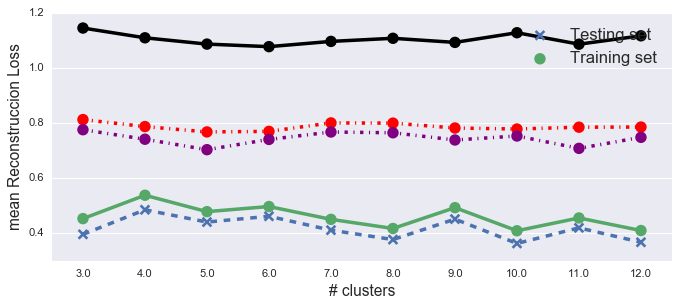

In [15]:
######################
## Visualize the reconstructed inputs and the encoded representations.
######################
dfSAE_perf = pd.DataFrame()
for SAE_perf in allAutoencoders:
    dfSAE_perf = dfSAE_perf.append( pd.DataFrame({'Reconstruction Error': pd.Series(SAE_perf)[0:2],
                                                  'generalizability': pd.Series(SAE_perf)[1]/pd.Series(SAE_perf)[0],
                                                  'train/validation':pd.Series(SAE_perf)[0:2].index, 
                                                  'num_clusters': SAE_perf['num_clusters']}) ) 
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(10, 4))
sns.set_color_codes("pastel")
axSAE_perf = sns.pointplot(x="num_clusters", y="Reconstruction Error", hue="train/validation", data=dfSAE_perf,  
                           markers=["x","o"], linestyles=["--","-"])  
axSAE_perf = sns.pointplot(x="num_clusters", y="generalizability", color='black', data=dfSAE_perf, ax=axSAE_perf)                             

aucZlatent_output_size = dict_aucZlatent[dict_aucZlatent['Zspacedim_cats']==output_size]
sns.pointplot(x="num_clusters", y="Zspace_AUC_ROC", color='red', linestyles=["-."], data=aucZlatent_output_size, ax=axSAE_perf)                             
sns.pointplot(x="num_clusters", y="Zspace_test_AUC_ROC", color='purple', linestyles=["-."], data=aucZlatent_output_size, ax=axSAE_perf)                             

ax.set_xlabel('# clusters',fontsize=14)
ax.set_ylabel('mean Reconstruccion Loss',fontsize=14)
ax.legend(loc="upper right",fontsize=15)

In [16]:
## save results to compare
# Pass cv data
MLP_train_iter = mx.io.NDArrayIter(Z_train, yZ_train, 50)    
# prob[i][j] is the probability that the i-th validation contains the j-th output class.
prob_train = mlp_model.predict(MLP_train_iter)


In [17]:
# save to R
pdZ_train = pd.DataFrame({"labels":yZ_train,
                          "probC":prob_train.asnumpy()[:,1],
                          "probNC":prob_train.asnumpy()[:,0]})
print(pdZ_train)
# by converting labels to (289L,1) and concat with (289L, 2L) = (289L,3L)
pdZ_train.to_csv('pdZ_train.csv', sep=',', encoding='utf-8', header=True, index=False)

     labels     probC    probNC
0         0  0.168150  0.831850
1         0  0.252249  0.747751
2         1  0.852703  0.147297
3         1  0.158406  0.841594
4         0  0.234078  0.765922
5         1  0.264423  0.735577
6         0  0.126331  0.873669
7         0  0.104256  0.895744
8         0  0.155487  0.844513
9         0  0.131976  0.868024
10        0  0.181444  0.818556
11        0  0.137233  0.862767
12        1  0.337790  0.662210
13        0  0.114876  0.885124
14        1  0.869022  0.130978
15        1  0.482328  0.517672
16        0  0.132510  0.867490
17        0  0.112781  0.887219
18        1  0.761882  0.238118
19        1  0.671245  0.328755
20        1  0.462532  0.537468
21        1  0.514066  0.485934
22        0  0.155968  0.844032
23        0  0.092322  0.907678
24        1  0.651779  0.348221
25        0  0.136971  0.863029
26        0  0.184948  0.815052
27        1  0.160638  0.839362
28        0  0.243174  0.756826
29        0  0.218294  0.781707
..      

In [18]:
# save to R
pdZ_test = pd.DataFrame({"labels":yZ_test,
                          "probC":probas_heldout.asnumpy()[:,1],
                          "probNC":probas_heldout.asnumpy()[:,0]})
print(pdZ_test)
# by converting labels to (289L,1) and concat with (289L, 2L) = (289L,3L)
pdZ_test.to_csv('pdZ_test.csv', sep=',', encoding='utf-8', header=True, index=False)


    labels     probC    probNC
0        1  0.396425  0.603575
1        0  0.159689  0.840311
2        0  0.169349  0.830651
3        1  0.190340  0.809660
4        0  0.178431  0.821569
5        1  0.350403  0.649597
6        1  0.367449  0.632551
7        0  0.164060  0.835940
8        1  0.479000  0.520999
9        0  0.166356  0.833643
10       0  0.141704  0.858296
11       0  0.200936  0.799064
12       0  0.181029  0.818971
13       0  0.159984  0.840016
14       0  0.159715  0.840284
15       0  0.127380  0.872620
16       1  0.247694  0.752306
17       0  0.149635  0.850365
18       1  0.196121  0.803879
19       0  0.273758  0.726242
20       0  0.125568  0.874432
21       0  0.162173  0.837827
22       0  0.176797  0.823203
23       0  0.158394  0.841606
24       1  0.420811  0.579189
25       0  0.224042  0.775958
26       0  0.250904  0.749097
27       0  0.415903  0.584097
28       0  0.085708  0.914292
29       1  0.155909  0.844091
..     ...       ...       ...
49      

In [19]:
# save to R
pdatalabels = pd.DataFrame({"labels":datalabels})
print(pdatalabels)
# by converting labels to (289L,1) and concat with (289L, 2L) = (289L,3L)
pdatalabels.to_csv('pdatalabels.csv', sep=',', encoding='utf-8', header=True, index=False)


    labels
0        M
1        B
2        B
3        M
4        B
5        M
6        M
7        B
8        M
9        B
10       B
11       B
12       B
13       B
14       B
15       B
16       M
17       B
18       M
19       B
20       B
21       B
22       B
23       B
24       M
25       B
26       B
27       B
28       B
29       M
..     ...
762      K
763      K
764      M
765      K
766      K
767      K
768      K
769      K
770      K
771      K
772      K
773      K
774      K
775      K
776      K
777      K
778      K
779      K
780      K
781      K
782      K
783      K
784      K
785      K
786      K
787      K
788      K
789      K
790      K
791      K

[792 rows x 1 columns]


In [20]:
pooled_pred_train.to_csv('pooled_pred_train.csv', sep=',', encoding='utf-8', header=True, index=False)
pooled_pred_val.to_csv('pooled_pred_val.csv', sep=',', encoding='utf-8', header=True, index=False)


In [30]:
input_size = combX_allNME.shape[1]
print "original input space = %d" % input_size 
pdAUC_Zlatent = pd.DataFrame() 
for k,znum in enumerate(latent_size):
    for l,num_c in enumerate(varying_mu):
        pdAUC_Zlatent = pdAUC_Zlatent.append( pd.Series({'num_clusters':num_c,
                                                        'spaceD_Redx':input_size/znum,
                                                         'Zspace_cvAUC_train': scoresM[k,l,0],
                                                         'Zspace_cvAUC_valid': scoresM[k,l,2]}), 
                                                          ignore_index=True)
         
print pdAUC_Zlatent  
pdAUC_Zlatent.to_csv('pdAUC_Zlatent.csv', sep=',', encoding='utf-8', header=True, index=False)


original input space = 523
    Zspace_cvAUC_train  Zspace_cvAUC_valid  num_clusters  spaceD_Redx
0             0.801616            0.811988             3            2
1             0.778517            0.786579             4            2
2             0.758591            0.767216             5            2
3             0.761565            0.769192             6            2
4             0.794541            0.799926             7            2
5             0.796605            0.799161             8            2
6             0.776311            0.781417             9            2
7             0.773957            0.777778            10            2
8             0.780966            0.784343            11            2
9             0.778359            0.784915            12            2
10            0.782138            0.778788             3            5
11            0.787349            0.784403             4            5
12            0.759464            0.762953             5       